# Аналитика данных компании Gectaro
Исполнитель: Дмитрий Демаков

**Оглавление**   
[1 Описание проекта](#description)   
- [1.1 Описание данных](#data)    

[2 Загрузка данных](#downloading)    
- [2.1  Выводы по разделу](#conclusion_1)

[3 Предобработка данных](#prepare)     
- [3.1  Выводы по разделу](#conclusion_2)

[4  Исследовательский анализ данных](#eda)        
- [4.1  Выводы по разделу](#conclusion_3)

[5  Портрет компании](#picture)       
- [5.1  Выводы по разделу](#conclusion_4)    

[6  Проверка гипотез](#hypothesis)     
- [6.1  Выводы по разделу](#conclusion_5)  


[7  Активность компаний](#activity)       
- [7.1  Выводы по разделу](#conclusion_6)    

[8  Результаты исследования](#result)    

## Описание проекта <a id='description'></a>
Вам предлагается поработать с данными компании Gectaro.
Gectaro – облачный сервис для автоматизации управления строительством и ремонтом.
Компания продает софт с платной подпиской в сегменте B2B (наиболее частый срок подписки 12-24 месяца), предназначенный для управления процессами в сфере строительства и ремонта.
Основная проблема – это уход из сервиса большого количества подписчиков и не продление подписки.

**Цель проекта**

Проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации. Для этого предлагается определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.
 
**Задачи**

1. Провести исследовательский анализ данных;
2. Сформулировать и проверить гипотезы, основываясь на имеющихся признаках;
3. Формулирование выводов по полученным результатам, подготовка презентации.

**Основные этапы исследования:**
-  Загрузить данные
- Предобработать данные
- Провести исследовательский анализ данных
- Сформулировать выводы
- Подготовить презентацию


#### Описание данных <a id='data'></a>

Таблица **people.csv** содержит информацию о сотрудниках компаний.

- `Id` - индекс	 
- `Company_id` - id компании	 
- `User_id` - id пользователя	 
- `Role_id` - id роли (должности)	 
- `Created_at` - дата создания пользователя	 
- `Updated_at` - дата обновления информации о пользователе	 
- `Is_deleted` - удален ли пользователь	 
- `Deleted_at` - дата удаления	 


Таблица **activities.csv** содержит данные об активности компаний по месяцам.

- `Company_id` -	Идентификатор компании	 
- `Month` -	Отчетный месяц	 
- `Company-month-billing` -	Количество счетов, выставленных в приложении, компанией за месяц	 
- `Company-month-stocks` -	Месячное количество складов (аренда, заказы и т.д.), используемых компанией	 
- `Company-month-backups` -	Месячное количество бэкапов компании	 
- `Company-month-projects` -	Месячное количество проектов компании	 
- `Company-month-contractors` -	Месячное количество контрагентов компании	 
- `Company-month-resource_orders` -	Месячное количество заказов материалов компании	 





Таблица **billing.csv** содержит данные о платежах.

- `Unnamed:0` -	Старый индекс	Использовать как индекс – index_col=0 при загрузке датасета
- `User_id` -	Идентификатор пользователя	 
- `Company_id` -	Идентификатор компании пользователя	 
- `Billing_tariff_id` -	Тарифный план
  - тарифы 1, 18, 22 - тестовые, бесплатные и пробные. Если такие есть - при анализе не должны использоваться. для остальных тарифов - основное различие - разное количество пользователей

  - тарифы 4, 7, 8, 11, 19 - группа “старт”

  - тарифы 2, 17 - группа “базовый”

  - тарифы 9, 20 - группа “бизнес”

  - тарифы 3, 10, 13, 21 - группа “Профи”

  - тариф 6 - “архивный”, в настоящее время не используется
- `Payed_until` -	 Дата, до которой подписка компании действует	 
- `Is_payed` -	Статус оплаты	 
- `Created_at` -	Дата создания	 
- `Updated_at` -	Дата обновления	
- `Billing_tariff_price_id` -	id стоимости тарифа
  - в разное время или для разных клиентов  один и тот же тариф может стоить по-разному 
- `Comment` -	Комментарии	 
- `Pay_date` -	Дата платежа	 


Таблица **companies.csv** содержит данные о компаниях.

- `Id` -	 id компании	 
- `Working_direction` -	 сфера деятельности	 
- `Employer_count_interval` -	 id количества сотрудников
  - По возрастающей id от 1 до 8, количество сотрудников - (1-4, 5-10, 11-20, 21-30, 31-50, 51-100, 101-200, >201)
- `Created_at` -	 дата создания компании в системе	 
- `Updated_at` -	 дата обновления информации о компании	 
- `Billing_tariff_id` -	id тарифа 	 см. выше
- `Billing_is_over` -	 истекла ли оплата	 

## Загрузка данных <a id='downloading'></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
from datetime import datetime, timedelta
import math as mth
import statistics
import phik

warnings.filterwarnings('ignore')

 **billing.csv** Загрузим таблицу, содержащую информацию о тарифах.

In [97]:
try:
    billing = pd.read_csv('C:/Users/dexp/datasets/gectaro/billing.csv', sep=',')
except:
    billing = pd.read_csv('billing.csv', sep=',')

In [98]:
billing.head()

,Unnamed: 0.1,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,4,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
1,6,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
2,16,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
3,18,18,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
4,24,24,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09


In [99]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             3480 non-null   int64  
 1   Unnamed: 0               3480 non-null   int64  
 2   id                       3480 non-null   int64  
 3   user_id                  3480 non-null   int64  
 4   company_id               3480 non-null   int64  
 5   billing_tariff_id        3480 non-null   int64  
 6   payed_until              3480 non-null   int64  
 7   is_payed                 3480 non-null   bool   
 8   created_at               3480 non-null   int64  
 9   updated_at               3480 non-null   int64  
 10  billing_tariff_price_id  3480 non-null   float64
 11  comment                  745 non-null    object 
 12  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(9), object(1)
memory usage: 329.8+ KB


Загрузка прошла без ошибок, в таблице 3480 записей. Данные в столбцах с датами необходимо привести к формату datetime. Столбцы  `Unnamed: 0.1`, `Unnamed: 0` хранят старые индексы, для исследования они нам не понадобятся, удалим их. Есть признаки наличия пропусков в данных.

 **activities.csv** Загрузим таблицу c месячной активностью.

In [100]:
try:
    activities = pd.read_csv('C:/Users/dexp/datasets/gectaro/activities.csv', sep=',')
except:
    activities = pd.read_csv('activities.csv', sep=',')
    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [101]:
activities.head()

,Unnamed: 0,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0


In [102]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6316 non-null   int64  
 1   company_id                     6316 non-null   int64  
 2   month                          6316 non-null   object 
 3   company-month-billing          6316 non-null   float64
 4   company-month-stocks           6316 non-null   float64
 5   company-month-backups          6316 non-null   float64
 6   company-month-projects         6316 non-null   float64
 7   company-month-contractors      6316 non-null   float64
 8   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 444.2+ KB


В таблице 6316 записей, загрузка прошла без ошибок. Столбец с месяцем нужно привести к формату datetime. Столбец `Unnamed: 0` похоже хранит старые индексы, его можно удалить. Названия столбцов содержат избыточную информацию, их можно подсократить и привести к "змеиному" регистру.

 **companies.csv** Загрузим таблицу c данными компаний.

In [103]:
try:
    companies = pd.read_csv('C:/Users/dexp/datasets/gectaro/companies.csv', sep=',')
except:
    companies = pd.read_csv('companies.csv', sep=',')

In [104]:
companies.head()

,Unnamed: 0,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,19,514,-,1.0,1571316635,1670298314,4.0,True
1,57,383,Строительство,2.0,1564142565,1676550050,7.0,False
2,69,495,-,1.0,1570535695,1598281714,2.0,False
3,75,724,-,1.0,1579514393,1670298294,4.0,True
4,99,471,-,1.0,1569328017,1670298360,7.0,True


In [105]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               723 non-null    int64  
 1   id                       723 non-null    int64  
 2   working_direction        720 non-null    object 
 3   employer_count_interval  723 non-null    float64
 4   created_at               723 non-null    int64  
 5   updated_at               723 non-null    int64  
 6   billing_tariff_id        716 non-null    float64
 7   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 40.4+ KB


Загрузка прошла без ошибок, в таблице 723 записи с данными о компаниях. Присутствуют признаки наличия пропусков. Столбец `Unnamed: 0` содержит не нужную для исследования информацию о старых индексах, удалим его. Столбцы `created_at`, `updated_at` необходимо привести к формату datetime.

 **people.csv** Загрузим таблицу c данными о сотрудниках.

In [106]:
try:
    people = pd.read_csv('C:/Users/dexp/datasets/gectaro/people.csv', sep=',')
except:
    people = pd.read_csv('people.csv', sep=',')

In [107]:
people.head()

,Unnamed: 0,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,2,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
1,6,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
2,7,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
3,10,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
4,17,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09


In [108]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5095 non-null   int64  
 1   id          5095 non-null   int64  
 2   company_id  5095 non-null   int64  
 3   user_id     3813 non-null   float64
 4   role_id     5095 non-null   int64  
 5   created_at  5095 non-null   int64  
 6   updated_at  5095 non-null   int64  
 7   is_deleted  5095 non-null   bool   
 8   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 323.5 KB


Таблица содержит 5095 записей о сотрудниках, загрузка прошла без ошибок. Присутствуют признаки наличия пропусков. Столбцы created_at, updated_at необходимо привести к формату datetime. Столбец Unnamed: 0 содержит не нужную для исследования информацию о старых индексах, удалим его.

### Вывод <a id='conclusion_1'></a>

Загрузки таблиц прошли без ошибок.
- В таблице billing.csv 3480 записей. Данные в столбцах с датами необходимо привести к формату datetime. Столбцы Unnamed: 0.1, Unnamed: 0 хранят старые индексы, для исследования они нам не понадобятся, их нужно удалить.
- В таблице activities.csv 6316 записей. Столбец с месяцем нужно привести к формату datetime. Столбец Unnamed: 0 хранит старые индексы, его можно удалить. Названия столбцов содержат избыточную информацию, сократим их приведем к "змеиному" регистру.
- В таблице companies.csv 723 записи с данными о компаниях. Присутствуют признаки наличия пропусков. Столбец Unnamed: 0 содержит не нужную для исследования информацию о старых индексах, удалим его. Столбцы created_at, updated_at необходимо привести к формату datetime.
- Таблица people.csv содержит 5095 записей о сотрудниках. Присутствуют признаки наличия пропусков. Столбцы created_at, updated_at необходимо привести к формату datetime. Столбец Unnamed: 0 содержит не нужную для исследования информацию о старых индексах, его можно удалить. Данные загружены и готовы для дальнейшей обработки.

## Предобработка данных <a id='prepare'></a>

### Таблица billings

Приведем столбцы с датами к формату datetime. Удалим лишние столбцы. 'billing_tariff_price_id' содержит целочисленные значения,  приведем его к формату int

In [109]:
def to_time(table, column):
    table[column] = pd.to_datetime(table[column], unit='s')
[to_time(billing, col) for col in ['payed_until', 'created_at', 'pay_date', 'updated_at']]
billing = billing.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id'], axis=1)
billing['billing_tariff_price_id'] = billing['billing_tariff_price_id'].astype('int')

**Дубликаты**

In [110]:
billing.duplicated().sum()

1

In [111]:
billing[billing.duplicated() == True]

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
2144,5832,4603,7,2023-03-30 11:46:49,False,2022-03-30 11:46:49,2022-03-30 11:46:49,23,NaN,NaT


В данных присутствует один полный дубликат, удалим его и проверим дубликаты по столбцам с датами.

In [112]:
billing = billing.drop_duplicates(keep='first')

In [113]:
data_search = billing.copy()
duplicated_data = data_search.duplicated(subset=['payed_until', 'updated_at'])
d_names = data_search[duplicated_data]['company_id']
print('Обнаружено дубликатов:', len(d_names))

Обнаружено дубликатов: 0


Дубликатов по датам не обнаружено, проверим пропуски.

**Пропуски**

In [114]:
billing.isna().agg(lambda x: f'{statistics.mean(x):.0%}').sort_values(ascending=False)

comment                    79%
pay_date                   68%
user_id                     0%
company_id                  0%
billing_tariff_id           0%
payed_until                 0%
is_payed                    0%
created_at                  0%
updated_at                  0%
billing_tariff_price_id     0%
dtype: object

Столбцы `comment`, `pay_date` содержат значительное количество пропусков 79% и 68%, поэтому удалять их не будем, пропуски в этих столбцах не повлияют на исследование. Возможная причина такого количества пропусков в том, что данные столбцы заполнялись вручную.

### Таблица activities

Удалим столбец `Unnamed: 0`. Приведем столбцы к змеиному регистру, уберем из названий столбцов "company_month_" - чтобы не загромождала лишней информацией. Приведем столбец "month" к формату datetime. 

In [115]:
activities = activities.drop('Unnamed: 0', axis=1)
activities.columns = activities.columns.str.replace('-', '_').str.replace('company_month_', '')
activities['month'] = pd.to_datetime(activities['month'], format='%Y-%m-%d').dt.date
activities['month'] = pd.to_datetime(activities['month'])

In [116]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company_id       6316 non-null   int64         
 1   month            6316 non-null   datetime64[ns]
 2   billing          6316 non-null   float64       
 3   stocks           6316 non-null   float64       
 4   backups          6316 non-null   float64       
 5   projects         6316 non-null   float64       
 6   contractors      6316 non-null   float64       
 7   resource_orders  6316 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 394.9 KB


**Дубликаты**

In [117]:
activities.duplicated().sum()

0

In [118]:
activities.duplicated(subset=['company_id', 'month']).sum()

0

Полные дубликаты и дублированнная информация о месячной активности компаний  отсутствуют.

**Пропуски**

In [119]:
activities.isna().agg(lambda x: f'{statistics.mean(x):.0%}').sort_values(ascending=False)

company_id         0%
month              0%
billing            0%
stocks             0%
backups            0%
projects           0%
contractors        0%
resource_orders    0%
dtype: object

Пропуски и дубликаты отсутствуют

### Таблица companies

Приведем данные `created_at`, `updated_at` к формату datetime. Удалим столбец `Unnamed: 0`. Стобец `id` содержит идентификатор компании, переименуем его в общее для остальных таблиц название "company_id". 

In [120]:
[to_time(companies, col) for col in ['created_at', 'updated_at']]
companies = companies.drop(['Unnamed: 0'], axis=1)
companies = companies.rename(columns={'id': 'company_id'})

In [121]:
companies.head()

,company_id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,514,-,1.0,2019-10-17 12:50:35,2022-12-06 03:45:14,4.0,True
1,383,Строительство,2.0,2019-07-26 12:02:45,2023-02-16 12:20:50,7.0,False
2,495,-,1.0,2019-10-08 11:54:55,2020-08-24 15:08:34,2.0,False
3,724,-,1.0,2020-01-20 09:59:53,2022-12-06 03:44:54,4.0,True
4,471,-,1.0,2019-09-24 12:26:57,2022-12-06 03:46:00,7.0,True


**Дубликаты**

In [122]:
companies.duplicated().sum()

0

In [123]:
companies.duplicated(subset=['company_id']).sum()

0

Полные дубликаты и дублированные идентификаторы компаний отсутствуют.

**Пропуски**

In [124]:
companies.isna().agg(lambda x: f'{statistics.mean(x):.0%}').sort_values(ascending=False)

billing_tariff_id          1%
company_id                 0%
working_direction          0%
employer_count_interval    0%
created_at                 0%
updated_at                 0%
billing_is_over            0%
dtype: object

1% пропусков присутствует только в столбце `billing_tariff_id`. Поскольку это данные о тарифах, заполнить их нечем. Такое небольшое количество пропусков не повлияет на исследование, оставим пропуски незаполненными.

### Таблица people

Приведем к формату datetime столбцы `created_at`, `updated_at`, `deleted_at`. Удалим столбец `Unnamed: 0`.

In [125]:
[to_time(people, col) for col in ['created_at', 'updated_at', 'deleted_at']]
people = people.drop(['Unnamed: 0'], axis=1)

**Дубликаты**

In [126]:
people.duplicated().sum()

0

In [127]:
people.duplicated(subset=['id', 'company_id']).sum()

0

Полные дубликаты и дубликаты сотрудников в компании отсутствуют.

**Пропуски**

In [128]:
people.isna().agg(lambda x: f'{statistics.mean(x):.0%}').sort_values(ascending=False)

deleted_at    57%
user_id       25%
id             0%
company_id     0%
role_id        0%
created_at     0%
updated_at     0%
is_deleted     0%
dtype: object

Столбцы `deleted_at`, `user_id` содержат 57% и 25% пропусков. Данные столбцы не будут использоваться в исследовании, оставим пропуски незаполненными.

### Вывод <a id='conclusion_2'></a>

В ходе предобработки внесены следующие изменения:

- Таблица billings. Столбцы с датами приведены к формату datetime. Поле 'billing_tariff_price_id' приведено к формату int. Удалены столбцы 'Unnamed: 0.1', 'Unnamed: 0', 'id'. В данных обнаружен и удален один полный дубликат. Дубликатов по датам не обнаружено. Столбцы 'comment', 'pay_date' содержат значительное количество пропусков 79% и 68%, поэтому удалять их не будем, пропуски в этих столбцах не повлияют на исследование. Возможная причина такого количества пропусков в том, что данные столбцы заполнялись вручную.

- Таблица activities. Удален столбец 'Unnamed: 0'. Названия столбцов приведены к змеиному регистру, из названий столбцов убраны слова "company_month_", чтобы не загромождать лишней информацией. Столбец "month" приведен к формату datetime. Полные дубликаты и дублированнная информация о месячной активности компаний не обнаружены. Пропуски отсутствуют.

- Таблица companies. Данные столбцов 'created_at', 'updated_at' приведены к формату datetime. Удален столбец 'Unnamed: 0'. Стобец 'id', содержащий идентификатор компании, переименован в общее для остальных таблиц название 'company_id'. Полные дубликаты и дублированные идентификаторы компаний отсутствуют. 1% пропусков присутствует в столбце 'billing_tariff_id'. Поскольку это данные о тарифах, заполнить их нечем. Поскольку такой небольшой процент пропусков не повлияет на исследование, пропуски оставили незаполненными.

- Таблица people. Столбцы 'created_at', 'updated_at', 'deleted_at' приведены к формату datetime. Удален столбец 'Unnamed: 0'. Полные дубликаты и дубликаты сотрудников в компании отсутствуют. Столбцы 'deleted_at', 'user_id' содержат 57% и 25% пропусков. Данные столбцы не будут использоваться в исследовании, поэтому пропуски оставлены незаполненными.

## Анализ данных <a id='eda'></a>

Поскольку данные в таблицах разнятся по представленным копаниям, типам временных даных и назначению, объединять их не будем, чтобы не вносить искажения в параметры. Добавим к таблицам целевую переменную и будем рассматривать содержание отдельно, джойня параметры из разных таблиц по мере необходимости.

### Определяем целевую переменную

Определяем дату последнего обновления, оределяем последний тариф, срок оплаты последнего тарифа, из полученных данных определяем отток. Таблица **"target"** сгруппирована по последнему обновлению, последнему тарифу и содержит идентификатор оттока `churn`: "1" - компания ушла в отток, "0" - компания подписана на сервис. Столбец `tariff_type` содержит информацию о типе тарифа.

In [129]:
def type_maker(t_id):
    if t_id in [4,7,8,11,19]:
        return 'start'
    elif t_id in [2,17]:
        return 'base'
    elif t_id in [9,20]:
        return 'business'
    elif t_id in [3, 10, 13, 21]:
        return 'profi'
    else:
        return 'archieve'

In [130]:
churn_id = billing.sort_values(by=['company_id', 'updated_at'])
churn_id = churn_id.groupby('company_id').agg({'updated_at': 'last'})
churn_id.reset_index(inplace= True)
target = billing.merge(churn_id, on=['company_id', 'updated_at'], how='inner')
target['tariff_type'] = target['billing_tariff_id'].apply(type_maker)
target['churn'] = 1
target.loc[target['payed_until'] > '2024-03-28', 'churn'] = 0
target.head()

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,tariff_type,churn
0,2707,2353,2,2021-06-30,True,2020-12-29 07:31:09,2020-12-30 11:48:13,7,"30,12 - пришла оплата",2020-12-29,base,1
1,4671,3785,2,2023-07-16,False,2021-07-16 13:59:48,2021-07-16 13:59:51,35,NaN,NaT,base,1
2,4451,3633,7,2021-08-13,True,2021-07-21 09:04:55,2021-08-11 10:55:48,23,"оплата пришла 5,08\r\nПереоткрыла другой лк",2021-08-05,start,1
3,5013,4032,2,2022-08-24,False,2021-08-24 15:48:36,2021-08-24 15:48:45,8,NaN,NaT,base,1
4,5022,4041,2,2021-09-07,False,2021-08-24 16:14:27,2021-08-24 16:14:46,7,NaN,NaT,base,1


Добавляем тип тарифа к таблице **billing**.

In [131]:
billing['tariff_type'] = billing['billing_tariff_id'].apply(type_maker)

Добавляем фактор отткока, срок действия контракта в таблицу **billing**.

In [132]:
billing['tariff_end'] = 0
billing['churn'] = 0

for i in billing.index:
    billing.loc[i, 'churn'] = target.loc[target['company_id'] == billing.loc[i, 'company_id']]['churn'].values
    billing.loc[i, 'tariff_end'] = target.loc[target['company_id'] == billing.loc[i, 'company_id']]['payed_until'].values[0]
    
billing['tariff_end'] = pd.to_datetime(billing['tariff_end'])
billing.head()

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,tariff_type,tariff_end,churn
0,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12,NaN,NaT,profi,2023-01-26,1
1,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23,NaN,2020-12-22 08:36:21,start,2022-08-28,1
2,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6,NaN,NaT,base,2023-04-30,1
3,2352,2035,7,2022-01-29 23:59:59,False,2020-12-25 07:59:35,2020-12-25 07:59:35,23,NaN,NaT,start,2022-11-03,1
4,1074,926,3,2021-01-30 00:00:00,True,2020-12-24 12:47:52,2020-12-25 12:34:34,9,NaN,2020-12-29 00:00:00,profi,2021-10-01,1


Посмотрим общее соотношение подписчиков и ушедших в отток по всем данным

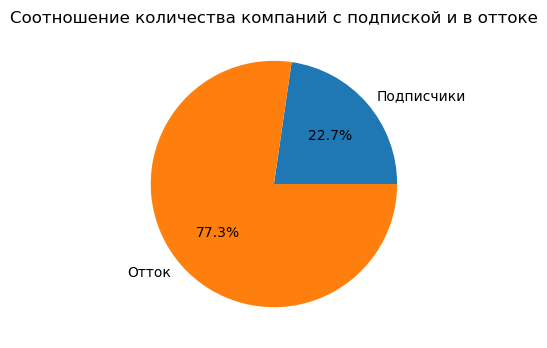

,company_id,kind
churn,,
0,418,Подписчики
1,1423,Отток


In [133]:
users_group = target.groupby('churn').agg({'company_id' : 'count'})
users_group['kind'] = 0
users_group.loc[users_group.index == 0, 'kind'] = 'Подписчики'
users_group.loc[users_group.index == 1, 'kind'] = 'Отток'
users_group['company_id'].plot(kind='pie', legend=False, figsize=(4, 4), 
                               autopct='%.1f%%',
                               labels=users_group['kind'])
plt.title('Соотношение количества компаний с подпиской и в оттоке')
plt.ylabel('', fontsize=13, color='black')
plt.show()
users_group

За всё время наблюдений в отток ушли 77.3% компаний. Определим, как различаются активности ушедших компаний и компаний подписчиков.

### Расспределение активностей компаний

In [134]:
activities['company_id'].nunique()

716

In [135]:
activities['month'].min()

Timestamp('2019-01-01 00:00:00')

In [136]:
activities['month'].max()

Timestamp('2024-03-01 00:00:00')

Таблица содержит данные об активности 716 компаний в период с 2019-01-01 по 2024-03-01. Посмотрим как распределены значения в полях.

In [137]:
print('Размер выборки:', activities.shape)
activities.describe()

Размер выборки: (6316, 8)


,company_id,billing,stocks,backups,projects,contractors,resource_orders
count,6316.000000,6316.000000,6316.000000,6316.000000,6316.000000,6316.000000,6316.000000
mean,4280.338505,0.375079,7.408486,1.178277,7.262666,7.906428,10.346105
std,2413.005439,0.800281,13.107824,3.135253,13.899203,27.966199,40.569956
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2459.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,4112.000000,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000
75%,6080.000000,1.000000,8.000000,0.000000,7.000000,7.000000,4.000000
max,9931.000000,16.000000,166.000000,22.000000,221.000000,1014.000000,1182.000000


В данных присутствуют выбросы значительно превышающие три стандартных отклонения. Чтобы определить основные тенденции в активности, уберем выбросы больше 90 перцетиля.

In [138]:
activities_clean = activities.copy()
suspect_columns = ['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders']
for col_name in suspect_columns:
    activities_clean = activities_clean.loc[(activities_clean[col_name] < 
                                             round(activities_clean[col_name].quantile(q=0.9), 2))]
activities_clean = activities_clean.merge(target[['company_id', 'churn']], on='company_id', how='left')
print('Размер выборки после очистки:', activities_clean.shape)

Размер выборки после очистки: (2662, 9)


После очистки размер выборки составил 2662 записей, выборка сохранила реперезентаивность. Посмотрим как распределяются значения в разрезе целевого параметра. 

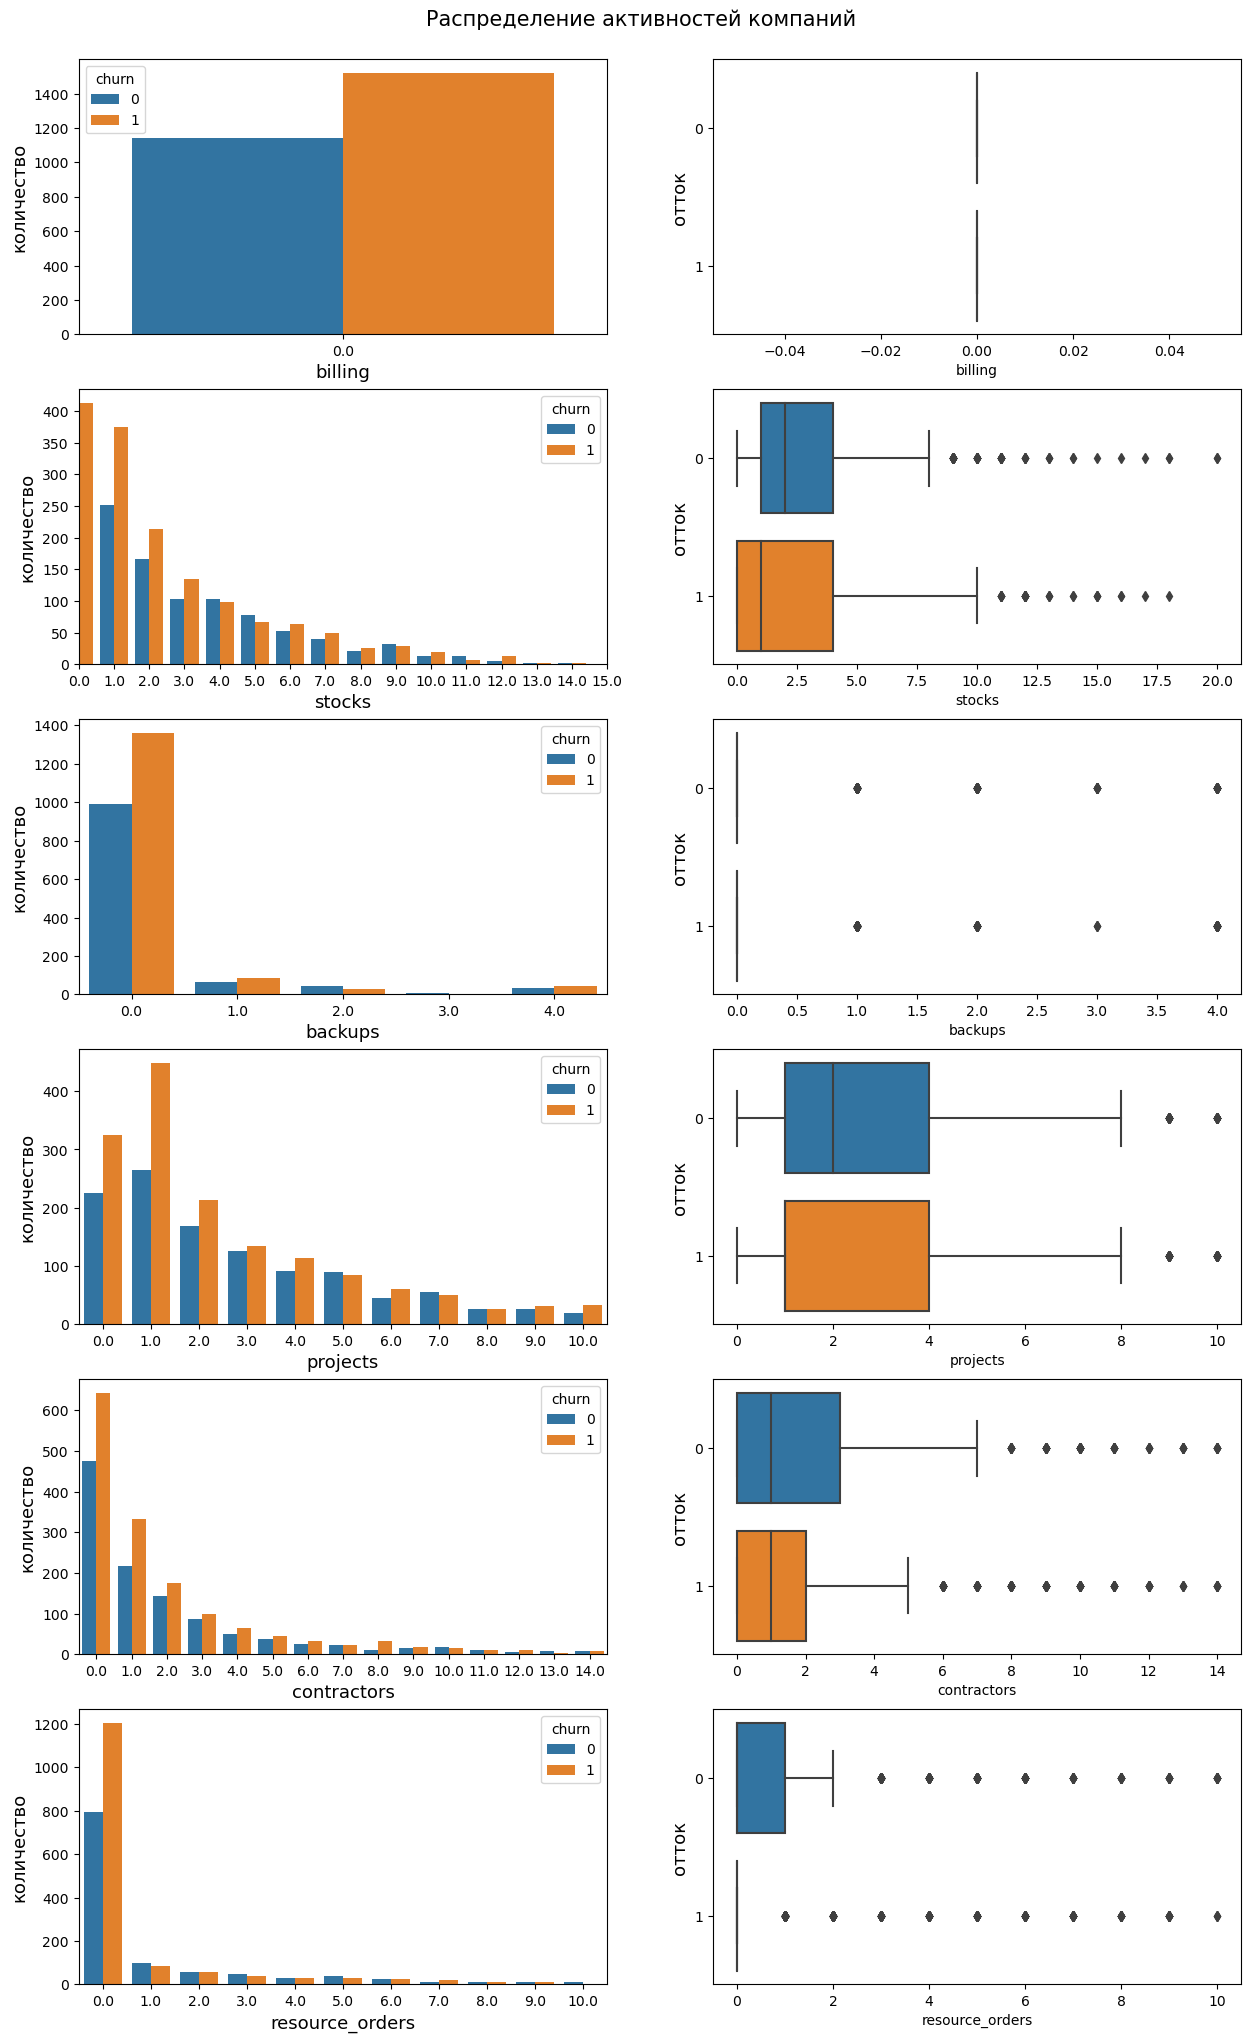

In [139]:
plt.figure(figsize=(15, 25))
plt.suptitle('Распределение активностей компаний', fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal', y=0.9)
i=1
for column in suspect_columns:
    
    sns.countplot(data=activities_clean, x=column, hue='churn',
                    ax=plt.subplot(len(suspect_columns),2,i))
    plt.xlabel(column, fontsize=13, color='black', y=0.9)
    plt.ylabel('количество', fontsize=13, color='black')
    plt.xticks(rotation=0, ha='center')
    if column == 'stocks':
        plt.xlim(0, 15)
    
    sns.boxplot(data=activities_clean, x=column, y='churn', orient='h',
                    ax=plt.subplot(len(suspect_columns),2,i+1))
    plt.ylabel('отток', fontsize=13, color='black')
    i+=2

plt.show()

Активность у обеих групп имеет схожий характер распределений, группа оттока больше по размеру и количественные показатели у неё выше.

Определим активность по времени

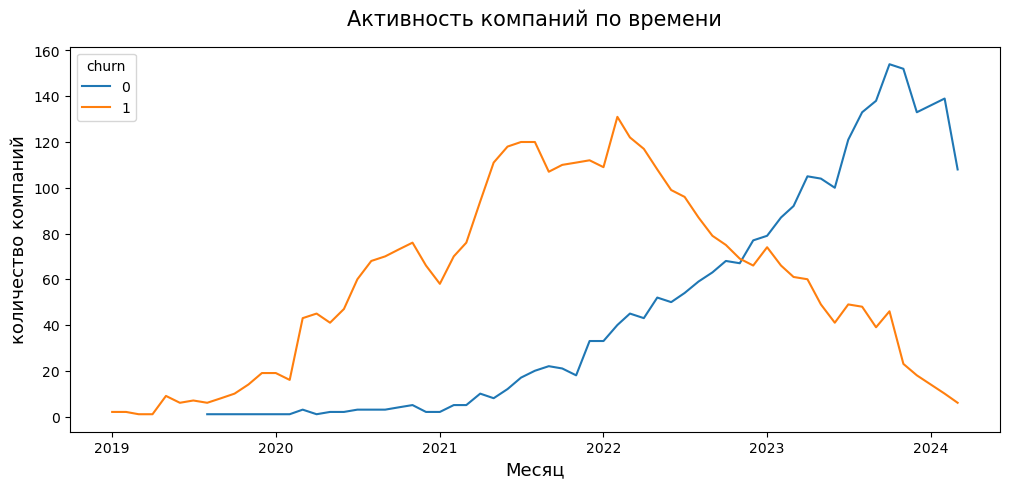

In [140]:
month_activities = activities.merge(target[['company_id', 'churn']], on='company_id', how='left')
month_activities = month_activities.groupby(['month', 'churn']).agg({'company_id': 'nunique'})
month_activities = month_activities.fillna(0)
month_activities.reset_index(inplace=True)
plt.figure(figsize=(12, 5))
sns.lineplot(data=month_activities, x='month', y='company_id', hue='churn')
plt.title('Активность компаний по времени', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Месяц', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')

plt.show()


Активность уникальных компаний ушедших в отток постоянно уменьшается, фактически они сначала перестают пользоваться сервисом, а потом у них заканчивается срок действия тарифа.Большинство компаний, которые вносили вклад в MAU в 2021 - 2022 годах на данный момент ушли в отток и основной вклад в MAU сейчас вносят компании, пришедшие в сервис после 2022 года.

### Распределение данных о компаниях

In [141]:
companies['company_id'].nunique()

723

In [142]:
companies['created_at'].min()

Timestamp('2019-01-23 14:00:51')

In [143]:
companies['created_at'].max()

Timestamp('2024-02-07 12:56:09')

В таблице `companies` данные о 723 компаниях, пришедших в сервис в период с 2019-01-23 по 2024-02-07. Построим распределения для категориальных и временных данных таблицы.

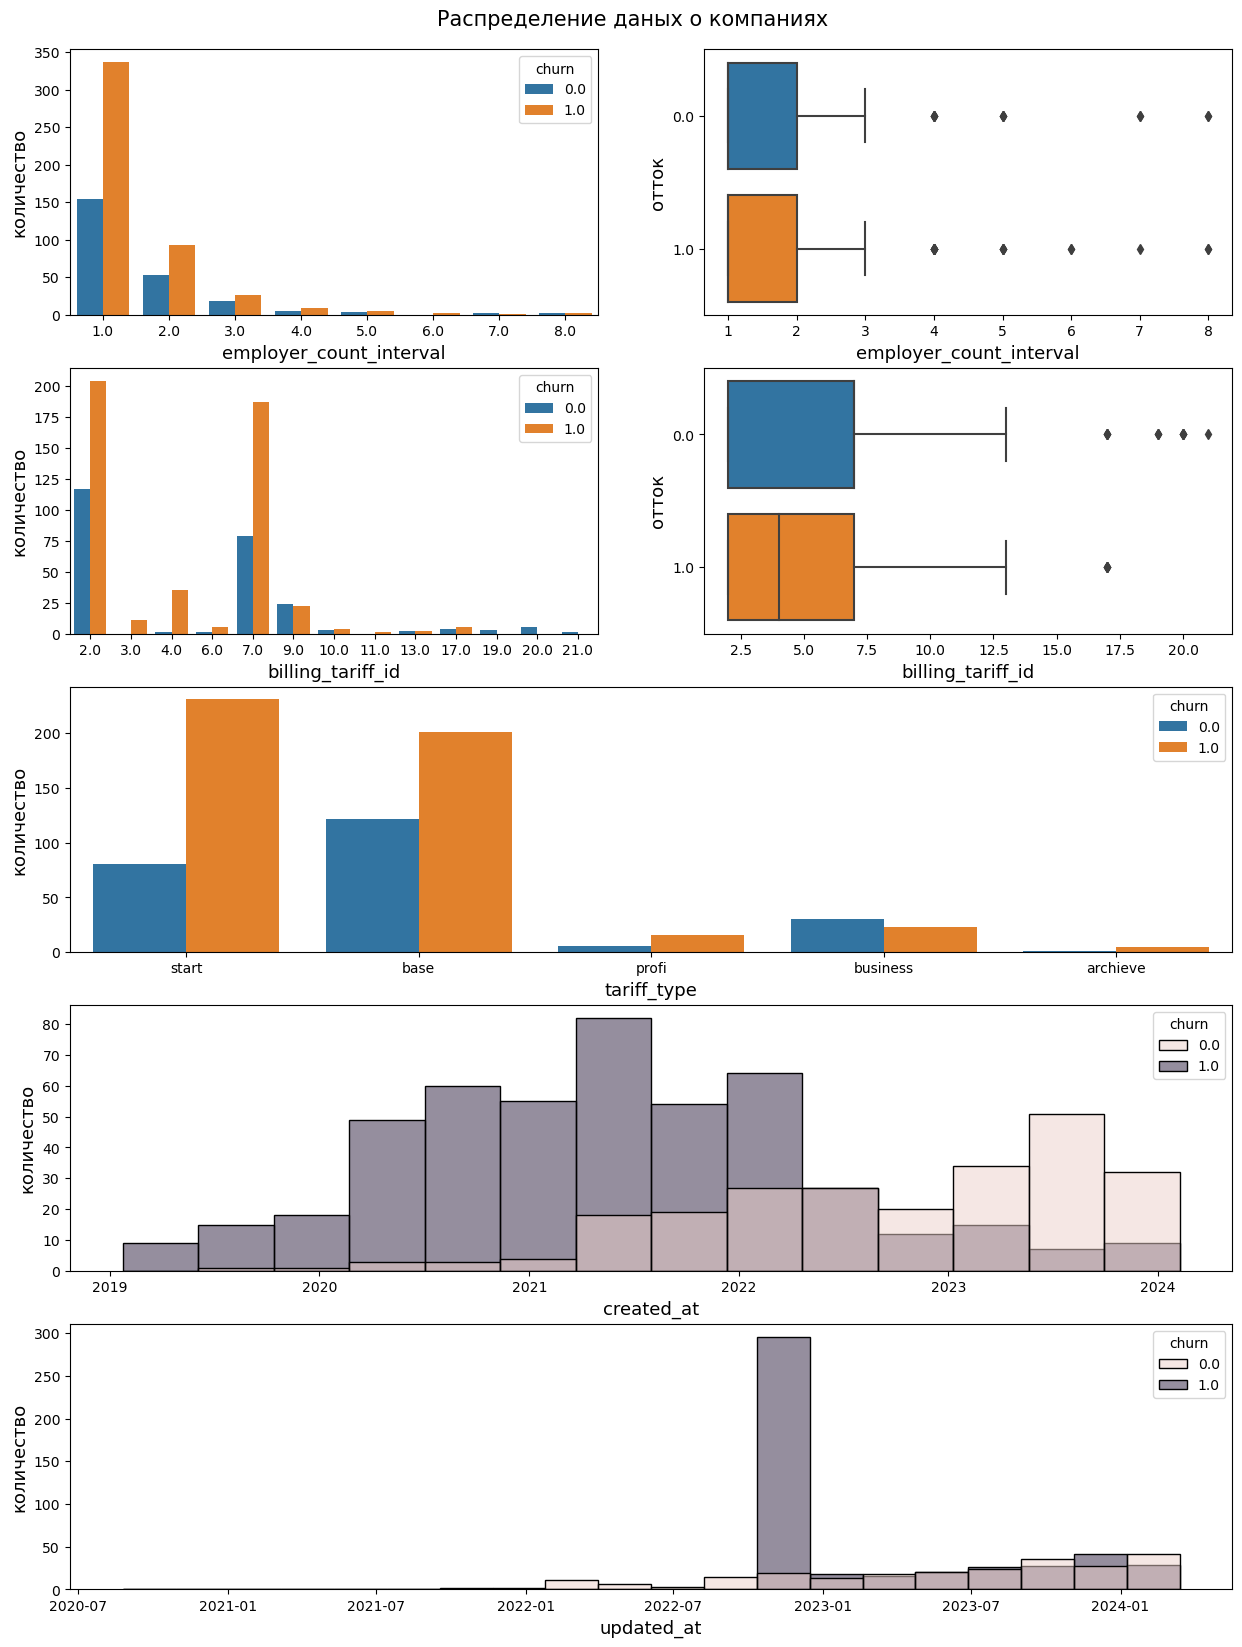

In [144]:
companies_clean = companies.merge(target[['company_id', 'tariff_type', 'churn']], on='company_id', how='left')

suspect_columns = ['employer_count_interval', 'billing_tariff_id', 'tariff_type', 'created_at', 'updated_at']
plt.figure(figsize=(15, 20))
plt.suptitle('Распределение даных о компаниях', fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal', y=0.9)

i=1
for column in suspect_columns:
    if column=='employer_count_interval' or column=='billing_tariff_id':
        sns.countplot(data=companies_clean, x=column, hue='churn',
                      ax=plt.subplot(len(suspect_columns),2,i))

        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('количество', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        
        sns.boxplot(data=companies_clean, x=column, y='churn', orient='h',
                    ax=plt.subplot(len(suspect_columns),2,i+1))
        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('отток', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        i+=2
    elif column=='tariff_type':
        sns.countplot(data=companies_clean, x=column, hue='churn',
                      ax=plt.subplot(len(suspect_columns),2,(i, i+1)))
        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('количество', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        i+=2
    else:
        sns.histplot(data=companies_clean, x=column, hue='churn', ax=plt.subplot(len(suspect_columns),2,(i, i+1)))
        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('количество', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        i+=2
plt.show()

Группы по фактору оттока показывают схожие соотношения распределений, кроме компаний на тарифе "business", для этого тарифа характерно, что количество компаний ушедших в отток меньше количества компаний подписчиков. Чем больше число сотрудников в компании, тем таких компаний меньше, в самых распространенных компаниях от 1 до 10 сотруднирков. Самые распространенные тарифы - 2, 7, 9 (базовый, старт, бизнесс). По времени регистрации компании можно увидеть, что недавно пришедшие колмпании менее склонны к оттоку, чем старые. Похоже у компаний есть определённый лайфтайм на платформе. График обновления показывает стабильный рост числа компаний, данные о которых обновляются.

### Таблица people

In [145]:
people.nunique()

id            5095
company_id     712
user_id       3528
role_id       1411
created_at    5019
updated_at    5062
is_deleted       2
deleted_at    2170
dtype: int64

In [146]:
people['created_at'].min()

Timestamp('2019-01-23 14:00:51')

In [147]:
people['created_at'].max()

Timestamp('2023-12-13 14:41:23')

В таблице данные о 5095 сотрудниках в 712 компаниях, добавленных в период с 2019-01-23 по 2023-12-13. Количество профессий сотрудников составляет 1411. Кроме полей с датами, остальные данные категориальные. Из таблицы мы можем получить данные о числе зарегистрированных сотрудников в копаниях.

In [148]:
company_size = people.pivot_table(index='company_id', values = 'user_id', aggfunc='count')
company_size.reset_index(inplace=True)
company_size_clean = company_size.copy()
company_size_clean = company_size_clean.loc[(company_size_clean['user_id'] < 
                                             round(company_size_clean['user_id'].quantile(q=0.99), 2))]
company_size_clean = company_size_clean.rename(columns={'user_id': 'registred_users'})
print('Размер выборки после очистки:', company_size_clean.shape)

Размер выборки после очистки: (703, 2)


In [149]:
company_size_clean = company_size_clean.merge(target[['company_id', 'churn']], on='company_id', how='left')

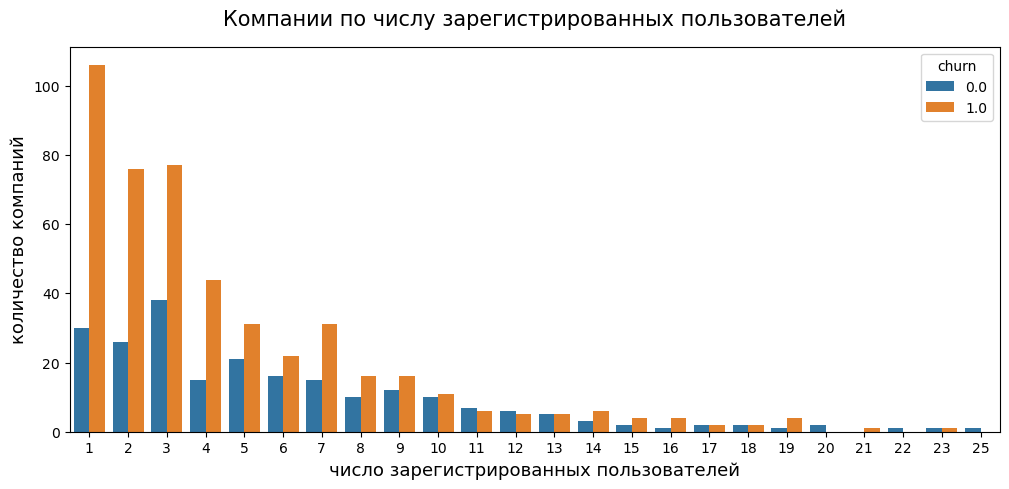

In [150]:
plt.figure(figsize=(12, 5))
sns.countplot(data=company_size_clean, hue='churn', x='registred_users')
plt.title('Компании по числу зарегистрированных пользователей', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('число зарегистрированных пользователей', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

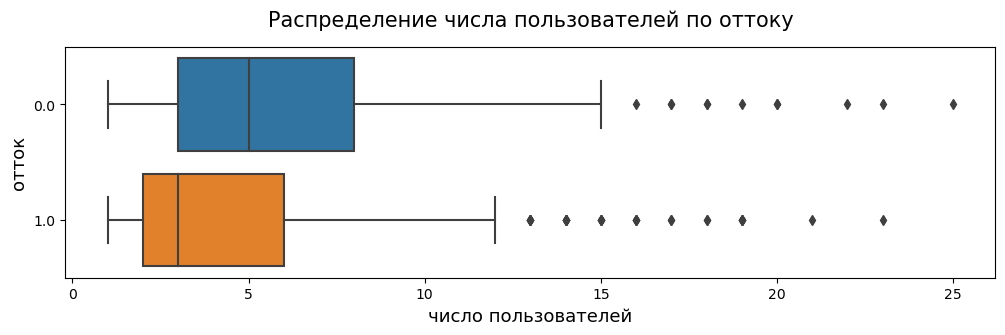

In [151]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=company_size_clean, x='registred_users', y='churn', orient='h')
plt.title('Распределение числа пользователей по оттоку', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('число пользователей', fontsize=13, color='black', y=0.9)
plt.ylabel('отток', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Чем меньше сотрудников в компании, тем таких компаний больше. Интересно что при числе сотрудников больше трёх, вероятность оттока компании начинает снижаться. Наболее подвержены оттоку компании с одним - двумя зарегистрированными сотрудниками.

In [152]:
print('Сотрудники всех компаний \n',
      company_size_clean['registred_users'].describe())
print('\nСотрудники компаний из оттока \n',
      company_size_clean.query('churn == 1')['registred_users'].describe())
print('\nСотрудники компаний подписчиков \n',
      company_size_clean.query('churn == 0').describe())

Сотрудники всех компаний 
 count    703.000000
mean       4.974395
std        4.302245
min        1.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       25.000000
Name: registred_users, dtype: float64

Сотрудники компаний из оттока 
 count    470.000000
mean       4.553191
std        4.025550
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       23.000000
Name: registred_users, dtype: float64

Сотрудники компаний подписчиков 
         company_id  registred_users  churn
count   227.000000       227.000000  227.0
mean   6627.158590         5.951542    0.0
std    2065.124109         4.702883    0.0
min     408.000000         1.000000    0.0
25%    5216.500000         3.000000    0.0
50%    6944.000000         5.000000    0.0
75%    8355.500000         8.000000    0.0
max    9538.000000        25.000000    0.0


В среднем в компаниях около 5 сотрудников медианное значение сотрудников равно трём. У компаний ушедших в отток медианное значение сотрудников также равно трём, среднее число сотрудников менее пяти. У компаний, с действущей подпиской, напротив медианное число сотрудников - 5 человек, а среднее почти шесть. Количество сотрудников в компании выше среднего может быть положителдьным фактором для продления подписки.  

### Таблица billing

In [153]:
activities_clean

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders,churn
0,1,2020-05-01,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,2020-08-01,0.0,9.0,0.0,9.0,0.0,0.0,1
2,1,2020-09-01,0.0,1.0,0.0,3.0,0.0,0.0,1
3,1,2020-10-01,0.0,5.0,3.0,9.0,0.0,0.0,1
4,21,2020-10-01,0.0,3.0,0.0,5.0,11.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2657,7882,2023-12-01,0.0,0.0,0.0,0.0,0.0,1.0,0
2658,8495,2024-02-01,0.0,0.0,0.0,0.0,0.0,1.0,0
2659,8513,2024-02-01,0.0,0.0,0.0,0.0,0.0,2.0,0
2660,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,0


Изучим распределение данных в таблице со счетами.

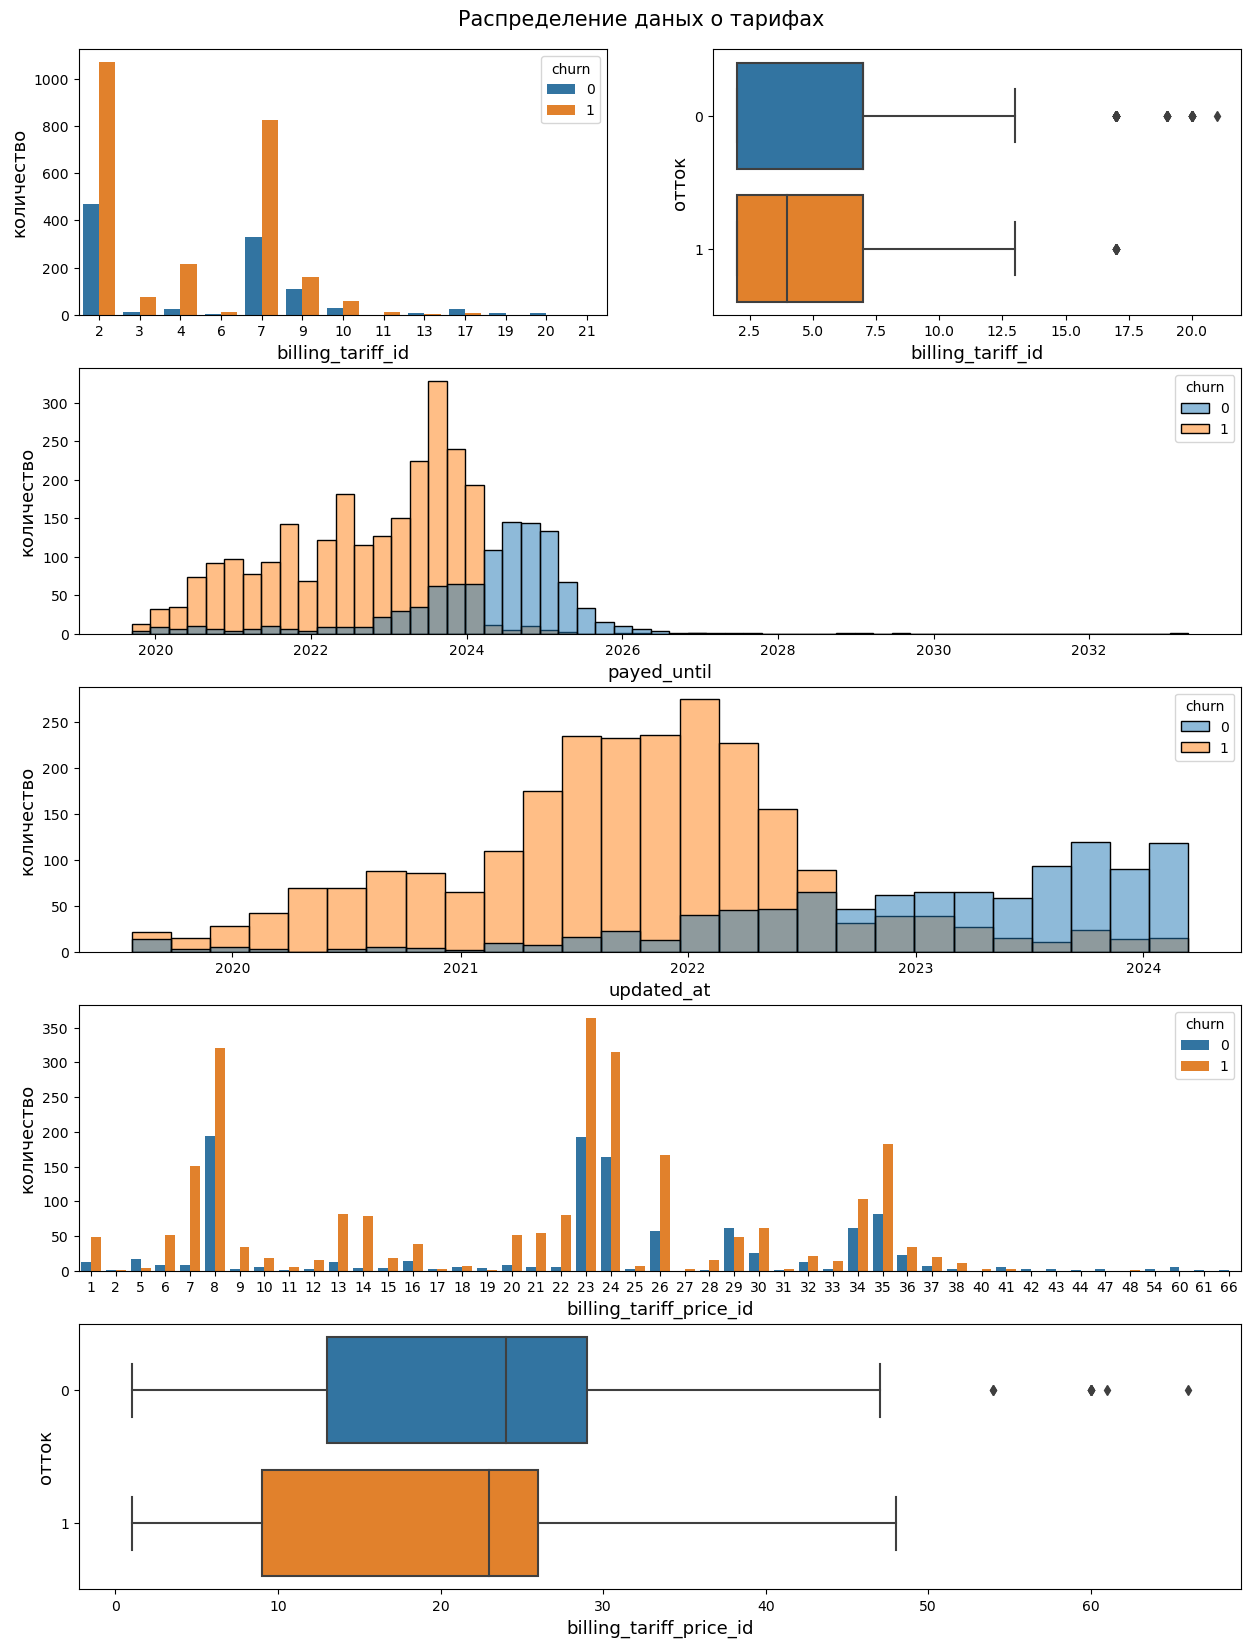

In [154]:
billing_clean = billing.copy()
suspect_columns = ['billing_tariff_id', 'payed_until', 'updated_at']
plt.figure(figsize=(15, 20))
plt.suptitle('Распределение даных о тарифах', fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal', y=0.9)

i=1    
for column in suspect_columns:
    if  column=='billing_tariff_id':
        sns.countplot(data=billing_clean, x=column, hue='churn',
                      ax=plt.subplot(5,2,i))
        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('количество', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        
        sns.boxplot(data=billing_clean, x=column, y='churn', orient='h',
                    ax=plt.subplot(5,2,i+1))
        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('отток', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        i+=2
    else:
        sns.histplot(data=billing_clean, x=column, hue='churn', ax=plt.subplot(5,2,(i, i+1)))
        plt.xlabel(column, fontsize=13, color='black', y=0.9)
        plt.ylabel('количество', fontsize=13, color='black')
        plt.xticks(rotation=0, ha='center')
        
        i+=2

sns.countplot(data=billing_clean, x='billing_tariff_price_id', hue='churn', ax=plt.subplot(5,2,(7, 8)))
plt.xlabel('billing_tariff_price_id', fontsize=13, color='black', y=0.9)
plt.ylabel('количество', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')

sns.boxplot(data=billing_clean, x='billing_tariff_price_id', orient='h', y='churn', ax=plt.subplot(5,2,(9, 10)))
plt.xlabel('billing_tariff_price_id', fontsize=13, color='black', y=0.9)
plt.ylabel('отток', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
        
plt.show()

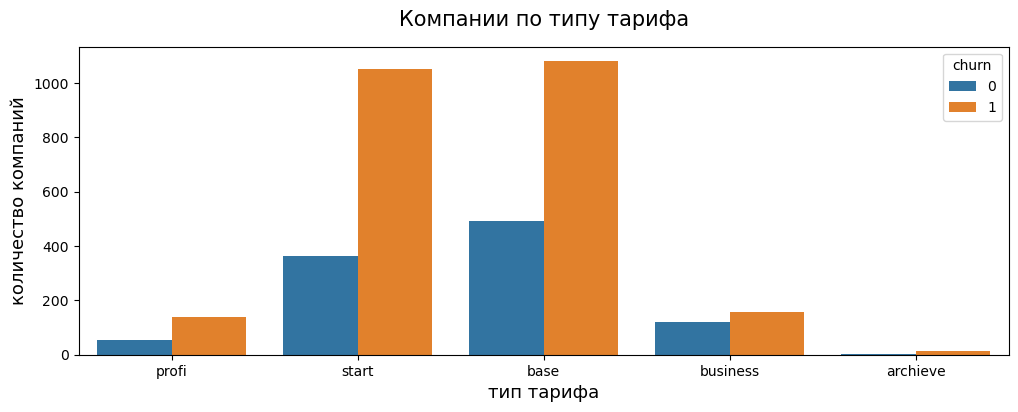

In [155]:
plt.figure(figsize=(12, 4))
sns.countplot(data=billing_clean, hue='churn', x='tariff_type')
plt.title('Компании по типу тарифа', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('тип тарифа', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Как и в данных по компаниям, наиболее популярными являются тарифы 2, 7, 9 (базовый, старт, бизнес), в этом таблицы billing и companies не противоречат друг другу, но таблица billing показывает для тарифа бизнес соотношение, в котором преобладают компании оттока. У большого числа компаний была подписка до второй половины 2023 года, но они её не продлили и ушли в отток. Похоже это связано с тем что в период с начала 2022 года количество обновлений тарифов начало снижаться. Компанни обновили тариф в 2022, и после этого не продлевали подписку. Возможно это как-то связано с временем жизни компании на платформе. По `billing_tariff_price_id` подписчики и отток распределены пропорционально общей тенденции, за исключением id 5 и 29, которые можно считать наиболее удачными в плане соотношения подписчиков и оттока.  Наибольшая доля оттока наблюдается на id 1, 6, 7, 13, 14, 20, 21, 22.

In [156]:
activities_clean

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders,churn
0,1,2020-05-01,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,2020-08-01,0.0,9.0,0.0,9.0,0.0,0.0,1
2,1,2020-09-01,0.0,1.0,0.0,3.0,0.0,0.0,1
3,1,2020-10-01,0.0,5.0,3.0,9.0,0.0,0.0,1
4,21,2020-10-01,0.0,3.0,0.0,5.0,11.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2657,7882,2023-12-01,0.0,0.0,0.0,0.0,0.0,1.0,0
2658,8495,2024-02-01,0.0,0.0,0.0,0.0,0.0,1.0,0
2659,8513,2024-02-01,0.0,0.0,0.0,0.0,0.0,2.0,0
2660,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,0


###  Корреляция признаков

Подготовим функции для расчета корреляции хи квадрат и Пирсона.

In [157]:
activities_clean

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders,churn
0,1,2020-05-01,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,2020-08-01,0.0,9.0,0.0,9.0,0.0,0.0,1
2,1,2020-09-01,0.0,1.0,0.0,3.0,0.0,0.0,1
3,1,2020-10-01,0.0,5.0,3.0,9.0,0.0,0.0,1
4,21,2020-10-01,0.0,3.0,0.0,5.0,11.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2657,7882,2023-12-01,0.0,0.0,0.0,0.0,0.0,1.0,0
2658,8495,2024-02-01,0.0,0.0,0.0,0.0,0.0,1.0,0
2659,8513,2024-02-01,0.0,0.0,0.0,0.0,0.0,2.0,0
2660,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,0


In [158]:
def pirson_searcher(table, category):
    return table['churn'].corr(table[category])

def phik_searcher(table, category):
    cor = table.loc[:,[category, 'churn']]
    cor = cor.dropna()
    return phik.phik_matrix(cor, interval_cols=[category], bins=10).loc[category, 'churn']

В таблице с целевыми переменными переведем типы тарифов к числовому виду, после чего создадим таблицу с расчетом корреляции желаемых параметров с показателем оттока.

In [159]:
def tariff_to_int(tariff):
    if tariff == 'base':
        return 1
    elif tariff == 'start':
        return 0
    elif tariff == 'profi':
        return 3
    elif tariff == 'business':
        return 2
    else:
        return 4
    
target_corr = target.copy()
target_corr['tariff_type'] = target_corr['tariff_type'].apply(tariff_to_int)

In [160]:
category_dict = {'registred_users': company_size_clean,
                 'billing_tariff_price_id': target,
                 'billing_tariff_id': target_corr,
                 'tariff_type': target_corr,
                 'employer_count_interval': companies_clean,
                 #'billing': activities_clean, 
                 'stocks': activities_clean, 
                 'backups': activities_clean, 
                 'projects': activities_clean, 
                 'contractors': activities_clean, 
                 'resource_orders': activities_clean
                }

indicator = [] 
pirson = []
phik_lib = []

for key in category_dict:
    indicator.append(key)        
    pirson.append(pirson_searcher(category_dict[key], key))
    phik_lib.append(phik_searcher(category_dict[key], key))

list_tuples = list(zip(indicator, pirson, phik_lib)) 
correlation_result = pd.DataFrame(list_tuples, columns=['category', 'pirson', 'phik']) 

correlation_result.style.background_gradient(cmap='coolwarm', axis=0).set_precision(3)

,category,pirson,phik
0,registred_users,-0.152,0.154
1,billing_tariff_price_id,-0.094,0.223
2,billing_tariff_id,-0.111,0.190
3,tariff_type,-0.054,0.062
4,employer_count_interval,-0.067,0.000
5,stocks,-0.069,0.114
6,backups,-0.034,0.052
7,projects,-0.058,0.104
8,contractors,-0.026,0.000
9,resource_orders,-0.081,0.141


Коэффициенты корреляции Пирсона и хи-квадрат не показали сильной взаимосвязи оттока от какого-то отдельного параметра, похоже на отток влияет совокупность нескольких факторов, сочетание которых дает негативный прогноз.

### Вывод <a id='conclusion_3'></a>

Поскольку данные в таблицах разнятся по представленным копаниям, типам временных даных и назначению, объединять их не стали, чтобы не вносить дополнительные искажения в общую картину. К таблицам были добавлены поля с целевой переменной, после чего содержание каждой таблицы было рассматрено отдельно.
Для определения целевой переменной была создана таблица "target", сгруппированая по последнему обновлению, последнему тарифу и содержащая идентификатор оттока 'churn': "1" - компания ушла в отток, "0" - компания подписана на сервис и столбец 'tariff_type' c информацией о типе тарифа.

За всё время наблюдений в отток ушли 77.3% компаний.
- Таблица activities содержит данные о действиях на платформе 716 компаний в период с 2019-01-01 по 2024-03-01. В данных присутствуют выбросы значительно превышающие три стандартных отклонения. Чтобы определить основные тенденции в активности, убрали выбросы больше 90 перцетиля. После очистки размер выборки составил 2662 записей, выборка сохранила реперезентаивность. Активность у групп по фактору имеет схожий характер распределений, группа оттока больше по размеру и количественные показатели у неё выше. Во времени активность уникальных компаний ушедших в отток постоянно уменьшается, фактически они сначала перестают пользоваться сервисом, а потом у них заканчивается срок действия тарифа. Большинство компаний, которые вносили вклад в MAU в 2021 - 2022 годах на данный момент ушли в отток и основной вклад в MAU сейчас вносят компании, пришедшие в сервис после 2022 года.

- Таблица companies содержит данные о 723 компаниях, пришедших в сервис в период с 2019-01-23 по 2024-02-07. На различных тарифах группы по фактору оттока показывают схожие соотношения распределений, кроме компаний **на тарифе "business", для этого тарифа характерно, что количество компаний ушедших в отток меньше количества компаний подписчиков**. Чем больше число сотрудников в компании, тем таких компаний меньше, в самых распространенных компаниях от 1 до 10 сотруднирков. Самые распространенные тарифы - 2, 7, 9 (базовый, старт, бизнесс). По времени регистрации компании можно увидеть, что недавно пришедшие колмпании менее склонны к оттоку, чем старые. **Похоже у компаний есть определённый лайфтайм на платформе**. График обновления показывает стабильный рост числа компаний, данные о которых обновляются.

- Таблица people содержит данные о 5095 сотрудниках в 712 компаниях, добавленных в период с 2019-01-23 по 2023-12-13. Количество профессий сотрудников составляет 1411. Кроме полей с датами, остальные данные категориальные. Из таблицы были получены данные о числе зарегистрированных сотрудников в копаниях. Чем меньше сотрудников в компании, тем таких компаний больше. **Интересно что при числе сотрудников больше трёх, вероятность оттока компании начинает снижаться. Наболее подвержены оттоку компании с одним - двумя зарегистрированными сотрудниками**. в среднем в компаниях около 5 сотрудников медианное значение сотрудников равно трём. У компаний ушедших в отток медианное значение сотрудников также равно трём, среднее число сотрудников менее пяти. У компаний, с действущей подпиской, напротив медианное число сотрудников - 5 человек, а среднее почти шесть. **Количество сотрудников в компании выше среднего может быть положителдьным фактором для продления подписки**.

- Таблица billing показывает, как и в данных по компаниям, что наиболее популярными являются тарифы 2, 7, 9 (базовый, старт, бизнес), но таблица billing показывает для тарифа бизнес соотношение, в котором преобладают компании оттока. У большого числа компаний была подписка до второй половины 2023 года, но они её не продлили и ушли в отток. Похоже это связано с тем что в период с начала 2022 года количество обновлений тарифов начало снижаться. Компанни обновили тариф в 2022, и после этого не продлевали подписку. Возможно это как-то связано с временем жизни компании на платформе. По billing_tariff_price_id подписчики и отток распределены пропорционально общей тенденции, за исключением **id 5 и 29, которые можно считать наиболее удачными в плане соотношения подписчиков и оттока**. Наибольшая доля оттока наблюдается на id 1, 6, 7, 13, 14, 20, 21, 22.

Расчет коэффициентов корреляции Пирсона и хи-квадрат не показали сильной взаимосвязи оттока от какого-то отдельного параметра, похоже на отток влияет **совокупность нескольких факторов**, сочетание которых дает негативный прогноз.

## Портрет компании <a id='picture'></a>

Разберемся как выглядит типичная компания работающая с сервисом.

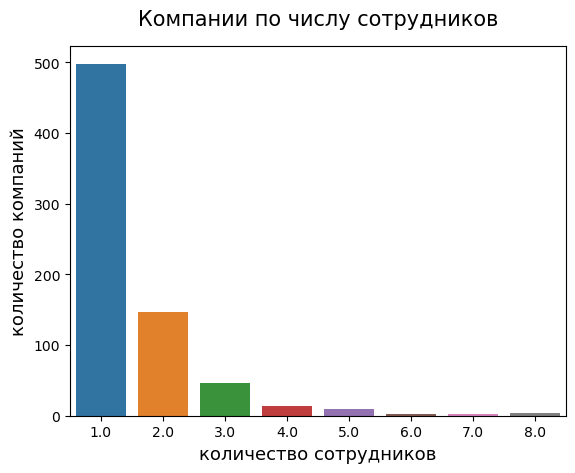

In [161]:
sns.countplot(data=companies, x='employer_count_interval')
plt.title('Компании по числу сотрудников', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('количество сотрудников', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Чаще всего в компании не более 10 сотрудников

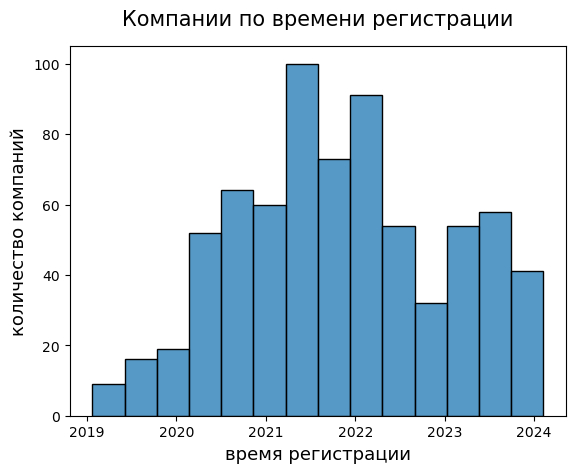

In [162]:
sns.histplot(data=companies, x='created_at')
plt.title('Компании по времени регистрации', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('время регистрации', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Саме распространенные компании подключились к сервису с 2020 по 2023 год.

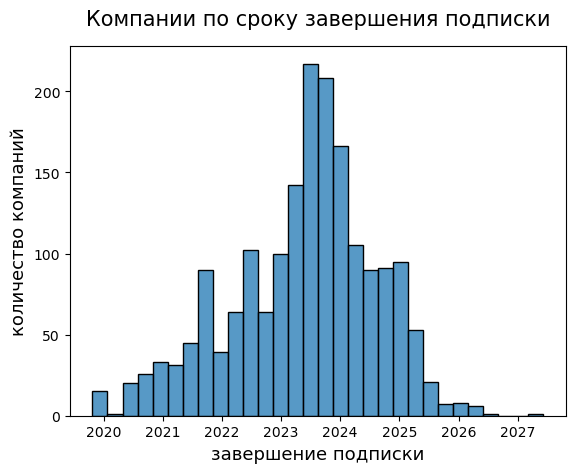

In [163]:
sns.histplot(data=target, x='payed_until')
plt.title('Компании по сроку завершения подписки', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('завершение подписки', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Типичная компания имеет подписку, заканчивающуюся с 2023 по 2025 год.

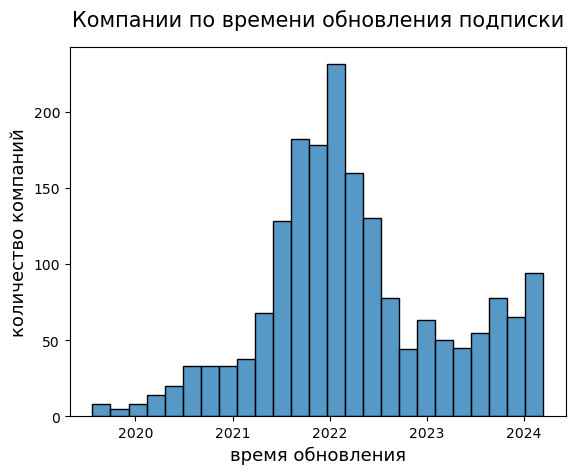

In [164]:
sns.histplot(data=target, x='updated_at')
plt.title('Компании по времени обновления подписки', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('время обновления', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()
plt.show()

У самых распространенных компаний подписка продлена в конце 2021 - начале 2022 года.

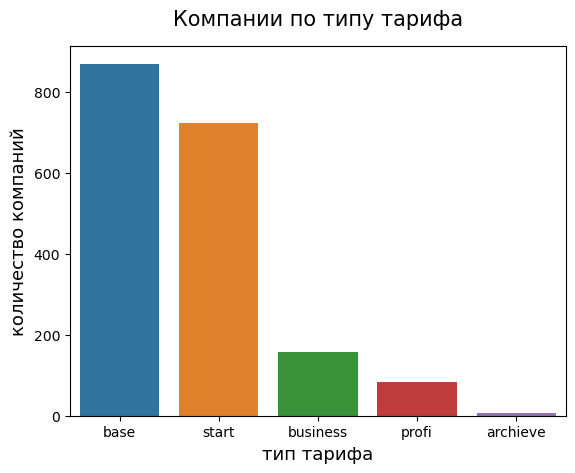

In [165]:
sns.countplot(data=target, x='tariff_type')
plt.title('Компании по типу тарифа', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('тип тарифа', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Среднестатистическая компания подписана на базовый или стартовый тариф 

### Вывод <a id='conclusion_4'></a>

В среднестатистической в компании не более 10 сотрудников. Чаще всего эти компании подключились к сервису с 2020 по 2023 год и имеют подписку, заканчивающуюся с 2023 по 2025 год. У самых распространенных компаний подписка продлена в конце 2021 - начале 2022 года и подписаны такие компании на базовый или стартовый тариф.

## Проверка гипотез <a id='hypothesis'></a>

Зададим функцию проверки гипотез о равенстве долей

In [166]:
# Функция проверки гипотезы о равенстве долей (z-test)        
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value, '\nУровень значимости:', alpha, '\nВывод:')

    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')

### Зависимость оттока от количества сотрудников <a id='tips'></a>    

Проверим есть ли зависимость оттока от количества сотрудников в компании. Выделим три группы:
- 1 категория (от 1 до 4 сотрудников)
- 2 категория (от 5 до 10 сотрудников)
- крупные компании (более 10 сотрудников) - все остальные категории

Посчитаем для этих трех групп соотношения долей компаний ушедших в отток. Для определения статистически значимой разницы между группами, приеменим проверку z-критерием по долям.

Сначала сформируем выборки по категориям, после чего начнем проверку гипотез.

In [167]:
size_group = companies_clean.pivot_table(index=['employer_count_interval', 'churn'], values='company_id', aggfunc='count')
size_group.reset_index(inplace=True)

count_1 = size_group[size_group['employer_count_interval'] == 1]['company_id'].sum()
count_2 = size_group[size_group['employer_count_interval'] == 2]['company_id'].sum()
count_3 = size_group[size_group['employer_count_interval'] > 2]['company_id'].sum()

count_1_target = size_group[(size_group['employer_count_interval'] == 1) & (size_group['churn'] == 1)]['company_id'].sum()
count_2_target = size_group[(size_group['employer_count_interval'] == 2) & (size_group['churn'] == 1)]['company_id'].sum()
count_3_target = size_group[(size_group['employer_count_interval'] > 2) & (size_group['churn'] == 1)]['company_id'].sum()

Одни компании имеют от 1 до 4 сотрудников, другие от 5 до 10 сотрудников. Проверим гипотезу: доля ушедших в отток компаний различается у этих двух групп.   

Сформулируем нулевую и альтернативную гипотезы:    

- **Нулевая гипотеза:** доля ушедших в отток компаний, имеющих от 1 до 4 сотрудников **равна** доле ушедших в отток компаний, имеющих от 5 до 10 сотрудников.
- **Альтернативная гипотеза:** доля ушедших в отток компаний, имеющих от 1 до 4 сотрудников **отличается** от доли ушедших в отток компаний, имеющих от 5 до 10 сотрудников.

In [168]:
# Вызываем функцию проверки гипотезы о равенстве долей (z-test)  
z_test(count_1_target, count_2_target, count_1, count_2, alpha=0.05)

p-значение:  0.27751117249548196 
Уровень значимости: 0.05 
Вывод:
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


Одни компании имеют от 1 до 4 сотрудников, другие более 10 сотрудников. Проверим гипотезу: доля ушедших в отток компаний различается у этих двух групп.   

Сформулируем нулевую и альтернативную гипотезы:    

- **Нулевая гипотеза:** доля ушедших в отток компаний, имеющих от 1 до 4 сотрудников **равна** доле ушедших в отток компаний, имеющих более 10 сотрудников.
- **Альтернативная гипотеза:** доля ушедших в отток компаний, имеющих от 1 до 4 сотрудников **отличается** от доли ушедших в отток компаний, имеющих более 10 сотрудников.

In [169]:
# Вызываем функцию проверки гипотезы о равенстве долей (z-test)  
z_test(count_1_target, count_3_target, count_1, count_3, alpha=0.05)

p-значение:  0.09611043408751874 
Уровень значимости: 0.05 
Вывод:
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


Одни компании имеют от 5 до 10 сотрудников, другие более 10 сотрудников. Проверим гипотезу: доля ушедших в отток компаний различается у этих двух групп.   

Сформулируем нулевую и альтернативную гипотезы:    

- **Нулевая гипотеза:** доля ушедших в отток компаний, имеющих от 5 до 10 сотрудников **равна** доле ушедших в отток компаний, имеющих более 10 сотрудников.
- **Альтернативная гипотеза:** доля ушедших в отток компаний, имеющих от 5 до 10 сотрудников **отличается** от доли ушедших в отток компаний, имеющих более 10 сотрудников.

In [170]:
# Вызываем функцию проверки гипотезы о равенстве долей (z-test)  
z_test(count_3_target, count_2_target, count_3, count_2, alpha=0.05)

p-значение:  0.4875757524813884 
Уровень значимости: 0.05 
Вывод:
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


Соотношения долей оттока компаний группах по количеству сотрудников не позволили отвергнуть гипотезы о том что процент оттока компаний одинаков в этих группах.

### Зависимость оттока от тарифа компании

Для проверки взаимосвязи оттока от тарифа зададим функцию для проверки гипотезы о равенстве долей.

In [171]:
# Функция проверки гипотезы о равенстве долей (z-test)        
def z_matrix(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

Определим доли компаний по тарифам и оттоку. Создадим матрицу статистической значимости "p_matrix" в которую внесем результаты z-теста.

In [172]:
tariff_group = target.pivot_table(index=['tariff_type', 'churn'], values='company_id', aggfunc='count')
tariff_group.reset_index(inplace=True)
p_matrix = pd.DataFrame(columns=['start', 'base', 'business', 'profi'], index=['start', 'base', 'business', 'profi'])
tariff_group

,tariff_type,churn,company_id
0,archieve,0,1
1,archieve,1,6
2,base,0,197
3,base,1,673
4,business,0,54
5,business,1,104
6,profi,0,19
7,profi,1,64
8,start,0,147
9,start,1,576


Выделим четыре тарифные группы:
- 'start'
- 'base'
- 'business'
- 'profi'

Посчитаем для этих трех групп соотношения долей компаний ушедших в отток. Для определения статистически значимой разницы между группами, приеменим проверку z-критерием по долям. Сначала сформируем выборки по категориям, после чего проверим гипотезы и внесем результирующее значение статистической значимости в таблицу.

Одни компании подписаны на один тариф, другие на другой. Проверим гипотезу: доля ушедших в отток компаний различается у этих двух групп.   

Сформулируем нулевую и альтернативную гипотезы для всех тарифов:    

- **Нулевая гипотеза:** доля компаний ушедших в отток с одного тарифа **равна** доле компаний, ушедших в отток с другого тарифа.
- **Альтернативная гипотеза:** доля компаний ушедших в отток с одного тарифа **отличается** от доли компаний, ушедших в отток с другого тарифа.

In [173]:
for column in p_matrix.columns:
    for index in p_matrix.index:
        p_matrix.loc[index, column] = z_matrix(
            tariff_group[(tariff_group['tariff_type'] == column) & (tariff_group['churn'] == 1)]['company_id'].sum(),
            tariff_group[(tariff_group['tariff_type'] == index) & (tariff_group['churn'] == 1)]['company_id'].sum(),
            tariff_group[tariff_group['tariff_type'] == column]['company_id'].sum(),
            tariff_group[tariff_group['tariff_type'] == index]['company_id'].sum(),
            alpha=0.05
            )
p_matrix

,start,base,business,profi
start,1.0,0.264259,0.000172,0.584968
base,0.264259,1.0,0.001906,0.958896
business,0.000172,0.001906,1.0,0.070032
profi,0.584968,0.958896,0.070032,1.0


Проверка соотношения долей показала, что для тарифов start, base, profi не получилось отвергнуть нулевую гипотезу, доли оттока в этих группах статистически значимо не различаются. Проверка соотношения долей  тарифа business с тарифами start и base, показала статистически значимые различия в доле оттока в группах, нулевая гипотеза для данных тарифов не подтвердилась.

### Динамика ухода с разных тарифов по годам

Сгруппируем таблицу с целевым показателем по годам, тарифам и оттоку. Проверим как со временем менялся отток по тарифам.

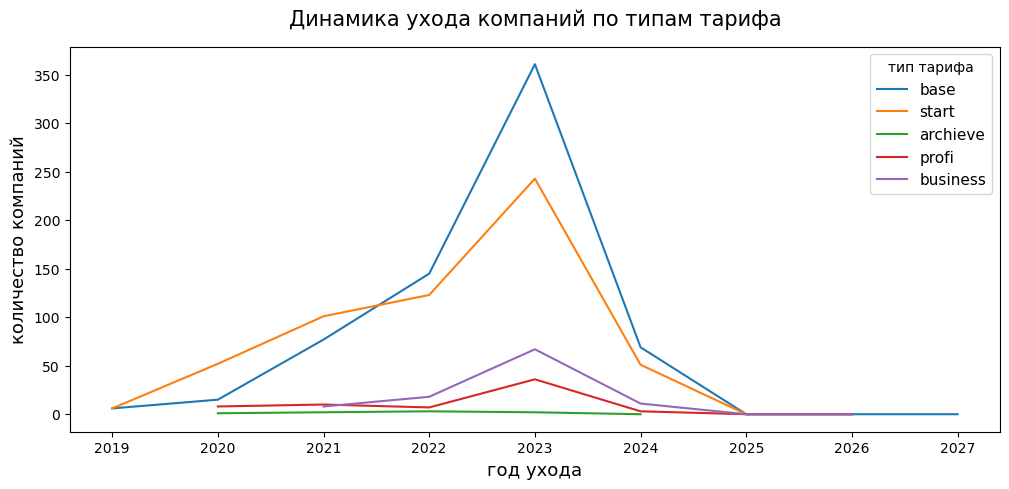

In [174]:
target_by_year = target.copy()
target_by_year['last_year'] = pd.to_datetime(target_by_year['payed_until']).dt.year

t = target_by_year.pivot_table(index=['last_year', 'tariff_type', 'churn'], values='company_id', aggfunc='count').unstack()
t.reset_index(inplace=True)
t = t.fillna(0)
t.columns = ['last_year', 'tariff_type', 'active_company', 'churn_company']
plt.figure(figsize=(12, 5))
sns.lineplot(data=t, x='last_year', y='churn_company', hue='tariff_type')

plt.title('Динамика ухода компаний по типам тарифа', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('год ухода', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.legend(fontsize=11, title='тип тарифа')
plt.show()

С ростом количества зарегистрированных в сервисе компаний увеличивалось число компаний, ушедших в отток. Сначала лидером по оттоку был тариф "start", но с 2021 года лидером по оттоку стал тариф "base". Такое соотношение связано скорее всего с тем, что количество компаний в группе "base" самое большое.

### Влияние billing_tariff_price_id на целевую переменную

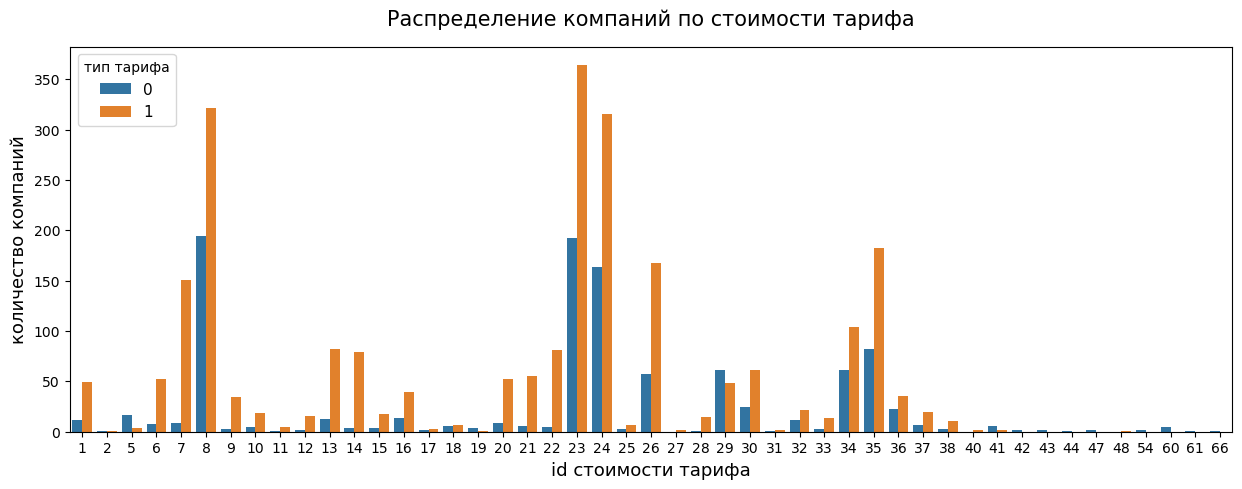

In [175]:
billing_tarif_id = billing_clean.pivot_table(index=['billing_tariff_price_id', 'churn'], values='company_id', aggfunc='count')
billing_tarif_id.reset_index(inplace=True)
billing_tarif_id.sort_values(by=['company_id'] , ascending=False)
billing_tarif_id
plt.figure(figsize=(15, 5))
sns.barplot(data=billing_tarif_id, hue='churn', x='billing_tariff_price_id', y='company_id')
plt.title('Распределение компаний по стоимости тарифа', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('id стоимости тарифа', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.legend(fontsize=11, title='тип тарифа')
plt.show()

Как мы расчитали ранее корреляция "billing_tariff_price_id" с оттоком довольно слабая: -0.094 для Пирсона и	0.223 для хи-квадрат. Подписчики и отток распределены пропорционально общей тенденции, за исключением id 5 и 29, которые можно считать наиболее удачными в плане соотношения подписчиков и оттока. Наибольшая доля оттока наблюдается на id 1, 6, 7, 13, 14, 20, 21, 22.

### Вывод <a id='conclusion_5'></a>

Для проверки зависимости оттока от количества сотрудников в компании выделили три группы: 1 категория (от 1 до 4 сотрудников), 2 категория (от 5 до 10 сотрудников) и крупные компании (более 10 сотрудников) - все остальные категории. Проверили гипотезы: доля ушедших в отток компаний различается у этих групп. Для определения статистически значимой разницы между группами, приеменили проверку z-критерием по долям. 
Соотношения долей оттока компаний группах по количеству сотрудников не позволили отвергнуть гипотезы о том что процент оттока компаний одинаков в этих группах. **Вероятность оттока не зависит от числа сотрудников**.

Для проверки взаимосвязи оттока от тарифа применили функцию для проверки гипотезы о равенстве долей. Одни компании подписаны на один тариф, другие на другой. Проверили гипотезы: доли ушедших в отток компаний различаются у этих двух групп.

Соотношения долей показали, что для тарифов start, base, profi не получилось отвергнуть нулевую гипотезу, доли оттока в этих группах статистически значимо не различаются. Проверка соотношения долей тарифа business с тарифами start и base, показала статистически значимые различия в доле оттока в группах, нулевая гипотеза для данных тарифов не подтвердилась. **Доля ушедших в отток с тарифа business оказалась меньше, чем у других тарифов**.

Анализ динамики ухода с разных тарифов по годам покзал, что сначала лидером по оттоку был тариф "start", но с 2021 года лидером по оттоку стал тариф "base". Такое соотношение связано скорее всего с, ростом количества компаний в группе "base".


Влияние billing_tariff_price_id на целевую переменную довольно слабое: коэффициент корреляции -0.094 для Пирсона и 0.223 для хи-квадрат. Подписчики и отток распределены пропорционально общей тенденции, за исключением id 5 и 29, которые можно считать наиболее удачными в плане соотношения подписчиков и оттока. Наибольшая доля оттока наблюдается на id 1, 6, 7, 13, 14, 20, 21, 22.

## Активность компаний <a id='activity'></a>

### Активность с течением времени

Посмотрим как современем менялось использование функционала платформы компаниями.

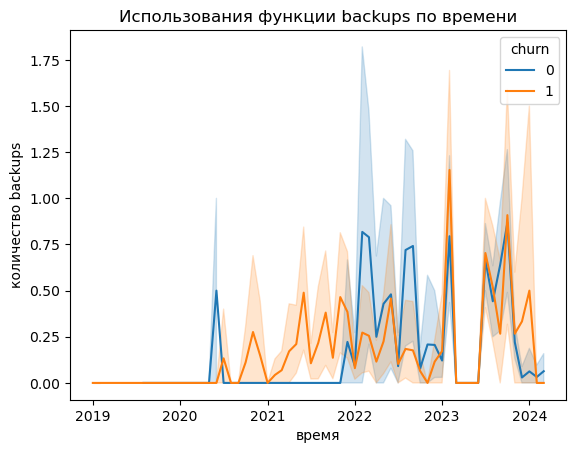

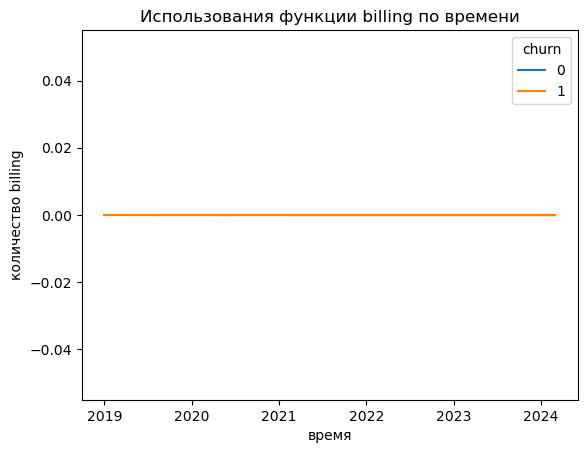

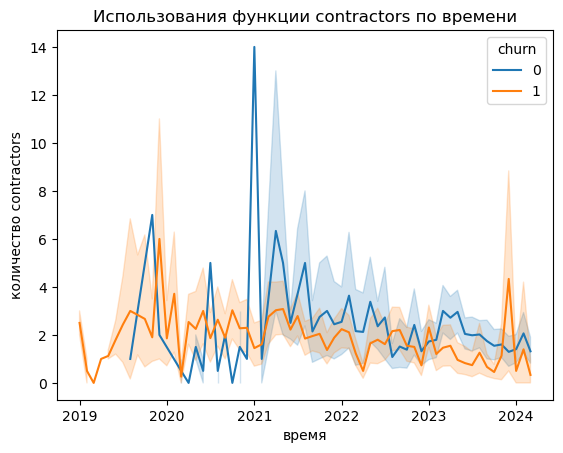

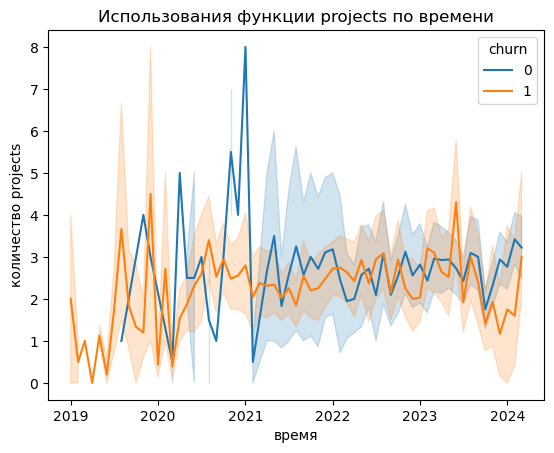

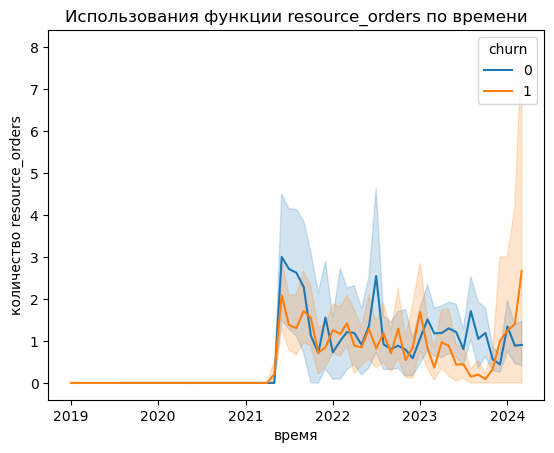

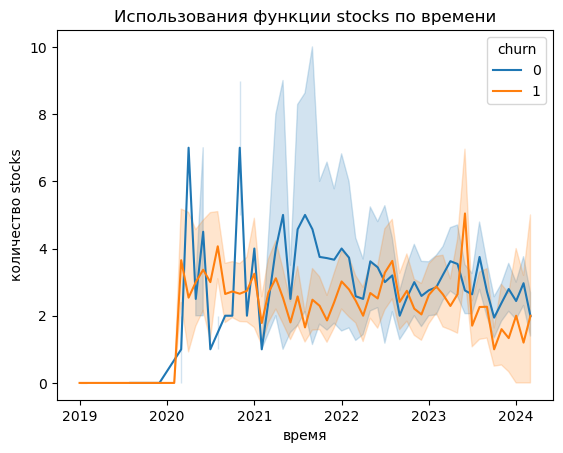

In [176]:
act = activities_clean.copy()
# Строим график для непрерывных и дискретных величин
cont_values = ['backups', 'billing', 'contractors', 'projects', 'resource_orders', 'stocks']
fig, ax = plt.subplots()
for column in cont_values:
    plt.title('Использования функции '+column+' по времени')
    sns.lineplot(x='month', y=column, hue='churn', data=act)
    plt.xlabel('время')
    plt.ylabel('количество '+column)
    plt.show()

Компании-подписчики  и ушедшие в отток показывают схожую медианную активность, но параметр месячного заказа материалов у ушедших в отток показывал постоянное снижение с 2022 года, а компании-подписчики по этому параметру в тоже время демонстровали рост. Этот показатель может быть одним из факторов прогнозирования вероятности оттока.

### Активность по месяцам жизни компаний

Сформируем на основе таблицы с активностями таблицу с месяцами жизни компаний и посмотрим как меняется взаимодействие с платформой за время нахождения на ней компании. 

In [177]:
activities_in_time = activities_clean.copy()
activities_in_time['life_month'] = 0
c_id=1
start_time = activities_in_time.loc[0, 'month']
for i in activities_in_time.index:
    if c_id == activities_in_time.loc[i, 'company_id']:
        activities_in_time.loc[i, 'life_month'] = round(((activities_in_time.loc[i, 'month'] - start_time).days) / 28)
    elif  c_id != activities_in_time.loc[i, 'company_id']:
        start_time = activities_in_time.loc[i, 'month']
        c_id = activities_in_time.loc[i, 'company_id']
        activities_in_time.loc[i, 'life_month'] = round(((activities_in_time.loc[i, 'month'] - start_time).days) / 28)

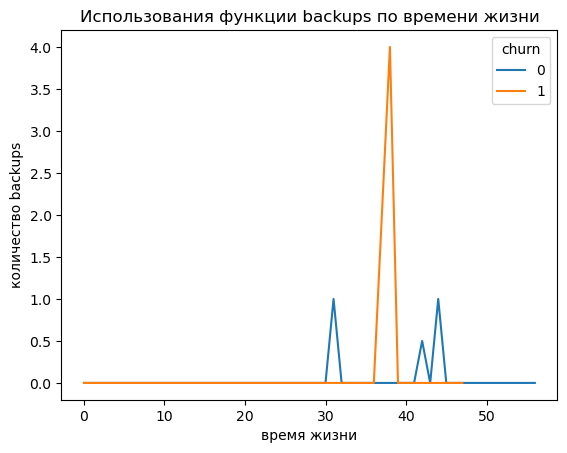

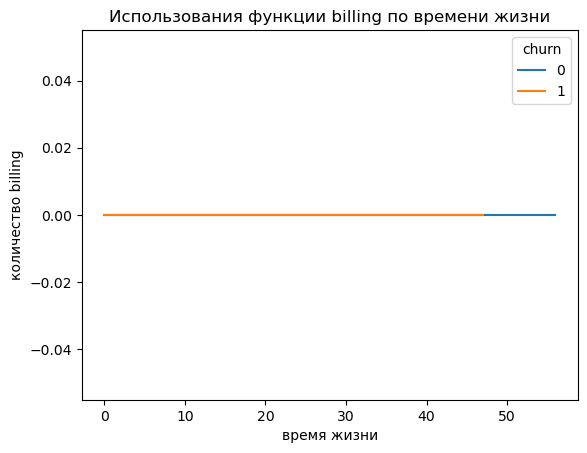

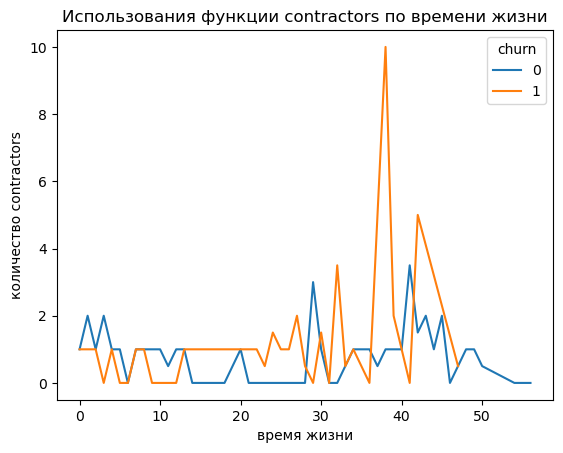

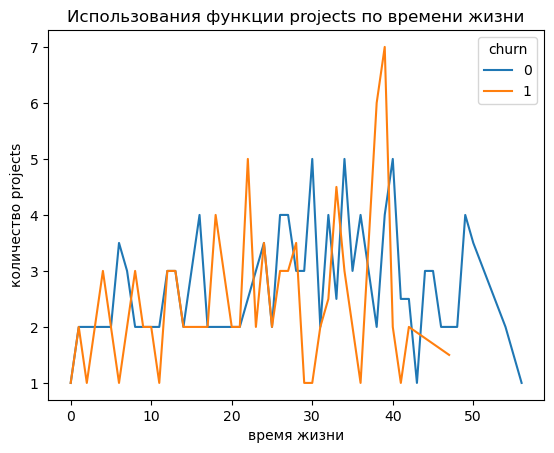

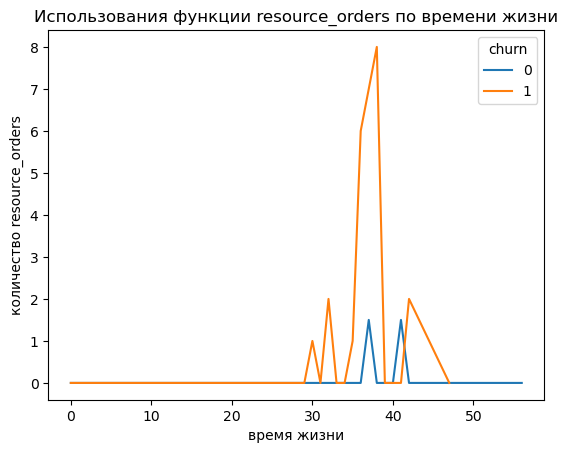

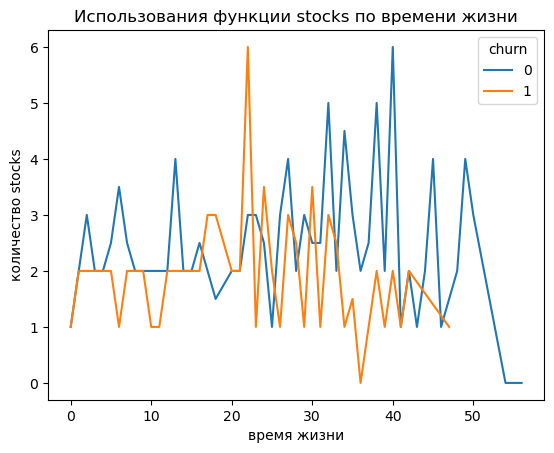

In [178]:
fig, ax = plt.subplots()
for column in cont_values:
    activities_in_time_group = activities_in_time.groupby(['life_month', 'churn']).agg({column: 'median'})
    activities_in_time_group.reset_index(inplace=True)
    
    sns.lineplot(x='life_month', y=column, hue='churn', data=activities_in_time_group)
    plt.title('Использования функции '+column+' по времени жизни')
    plt.xlabel('время жизни')
    plt.ylabel('количество '+column)
    plt.show()

В первое время на платформе у групп оттока и подписчиков одинаково низкое количество действий. Активизация начинается после 30 месяца жизни, причем для ушедших в отток более характерна активность, связанная с взаимодействием со складами, созданием проектов и выставлением счетов. Компании, не ушедшие в отток чаще заказывают материалы. У обеих групп схожий формат взаимодействия с контрагентами.

### Активность во времени по тарифам

Посмотрим как со временем жизни компании меняется взаимодействие с платформой на разных тарифах.

In [179]:
activities_in_time_tariff = activities_in_time.merge(target[['company_id', 'tariff_type']], how='left')
activities_in_time_tariff = activities_in_time_tariff.query('tariff_type != "archieve"')

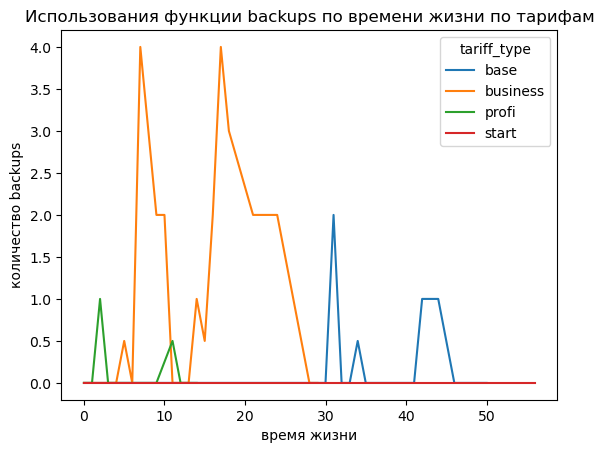

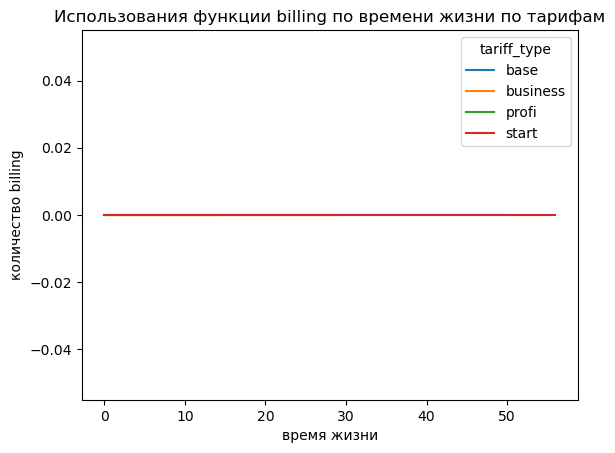

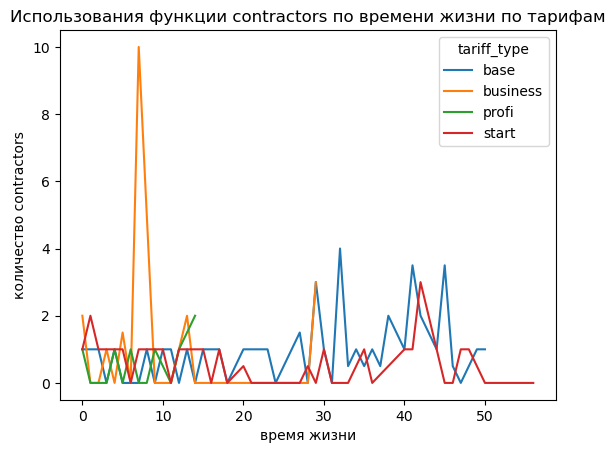

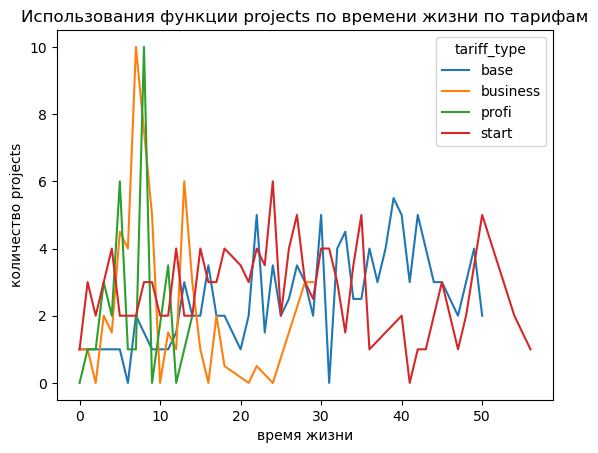

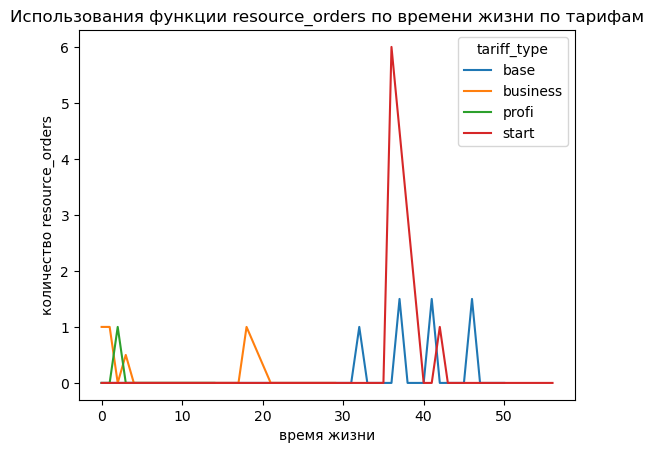

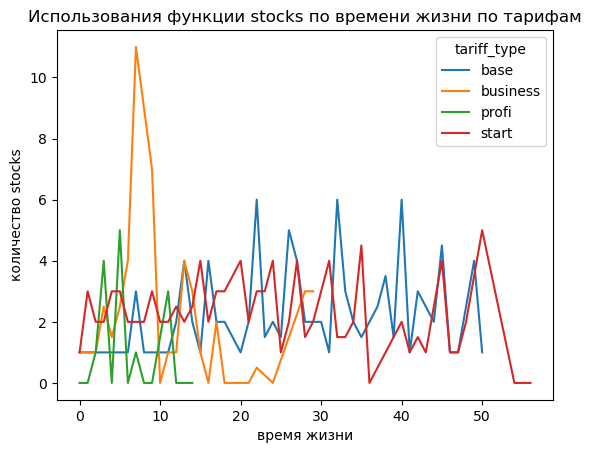

In [180]:
fig, ax = plt.subplots()
for column in cont_values:
    
    activities_in_time_group = activities_in_time_tariff.groupby(['life_month', 'tariff_type']).agg({column: 'median'})
    activities_in_time_group.reset_index(inplace=True)
    
    sns.lineplot(x='life_month', y=column, hue='tariff_type', data=activities_in_time_group)
    plt.title('Использования функции '+column+' по времени жизни по тарифам')
    plt.xlabel('время жизни')
    plt.ylabel('количество '+column)
    plt.show()

Взаимодействие со складами, контрагентами, создание проектов и выставление счетов наиболее характерно для тарифов бизнес и профи. Материалы активнее заказывают на тарифе бизнес. Прослеживаются характерные для отрасли периоды отсутствия заказов и всплесков активности.

### Лайфтайм компаний

Посчитаем время активности компаний на платформе

Лайфтайм всех компаний 
 count    605.000000
mean       7.489256
std        9.854839
min        0.000000
25%        0.000000
50%        3.000000
75%       12.000000
max       56.000000
Name: life_month, dtype: float64

Лайфтайм компаний, ушедших в отток 
 count    388.000000
mean       6.538660
std        8.811318
min        0.000000
25%        0.000000
50%        2.500000
75%       11.000000
max       47.000000
Name: life_month, dtype: float64

Лайфтайм компаний-подписчиков 
 count    217.00000
mean       9.18894
std       11.31110
min        0.00000
25%        0.00000
50%        4.00000
75%       13.00000
max       56.00000
Name: life_month, dtype: float64


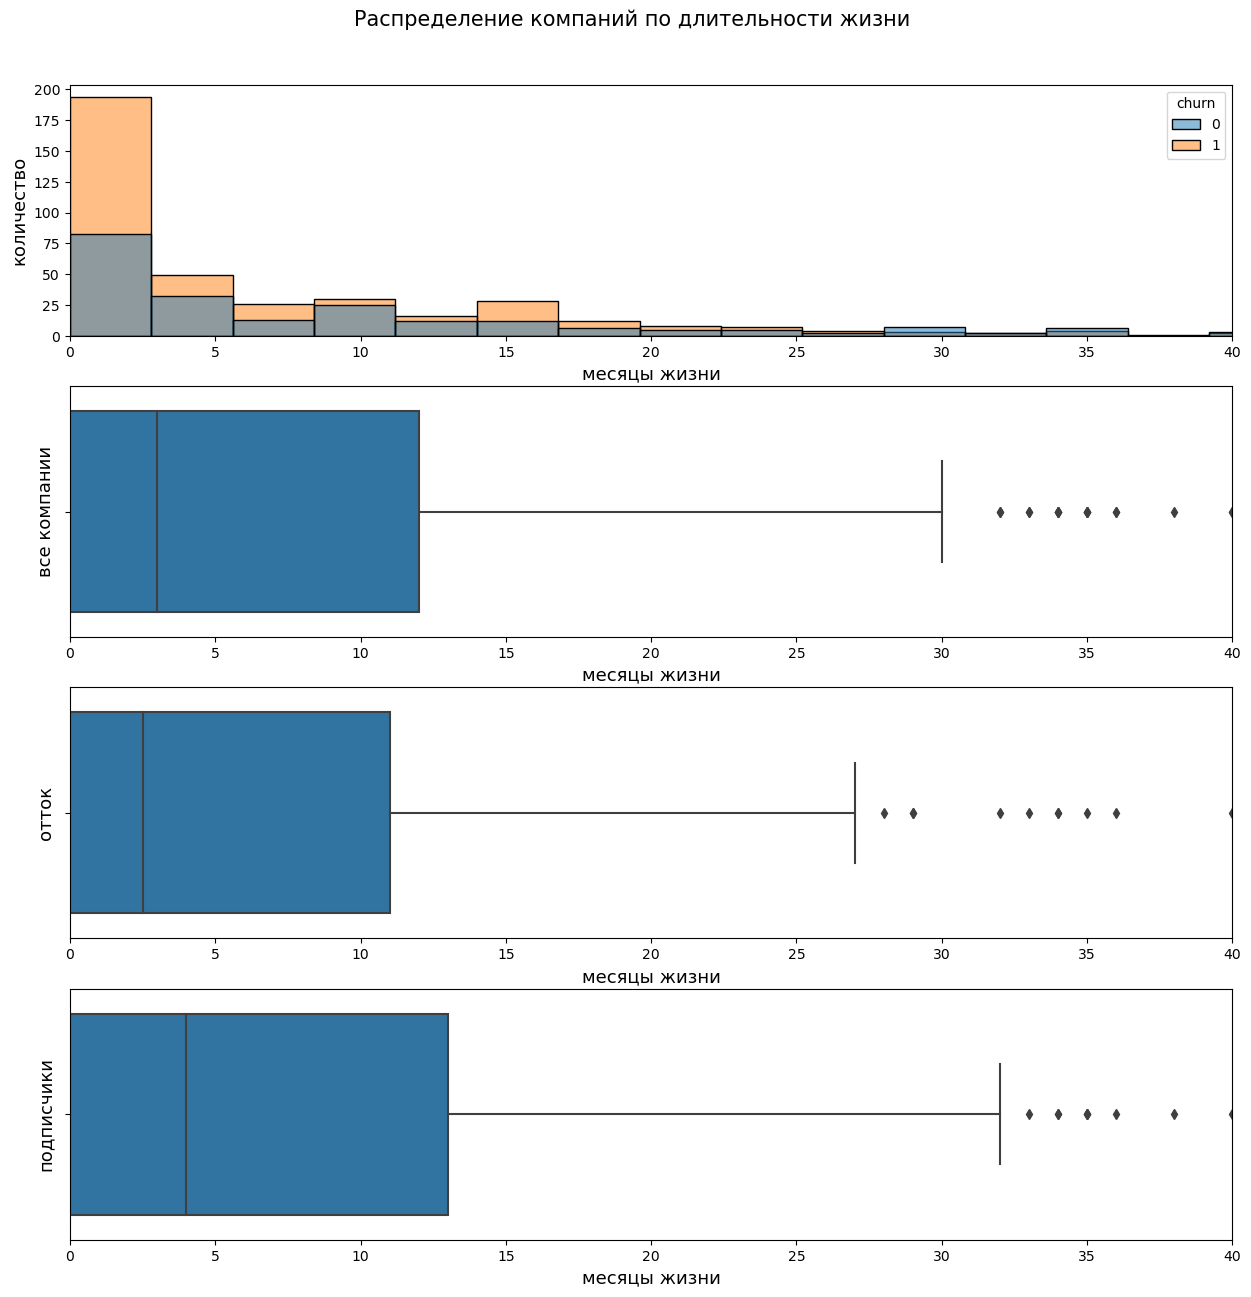

In [181]:
lifetime = activities_in_time_tariff.groupby(['company_id', 'churn']).agg({'life_month': 'max'})

plt.figure(figsize=(15, 15))
plt.suptitle('Распределение компаний по длительности жизни', fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal', y=0.93)

sns.histplot(data=lifetime, x='life_month', bins=20, hue='churn', ax=plt.subplot(4,1,1))
#plt.yticks(rotation=90, ha='center')
plt.xlim(0, 40)
plt.xlabel('месяцы жизни', fontsize=13)
plt.ylabel('количество', fontsize=13)
#plt.xlabel(rus_dict.get('duration'), fontsize=13)
#plt.xlim(0, 8000)
sns.boxplot(data=lifetime, x='life_month', orient='h', ax=plt.subplot(4,1,2))
plt.xlim(0, 40)
plt.xlabel('месяцы жизни', fontsize=13)
plt.ylabel('все компании', fontsize=13)
sns.boxplot(data=lifetime.query('churn == 1'), x='life_month', orient='h', ax=plt.subplot(4,1,3))
plt.xlim(0, 40)
plt.xlabel('месяцы жизни', fontsize=13)
plt.ylabel('отток', fontsize=13)
sns.boxplot(data=lifetime.query('churn == 0'), x='life_month', orient='h', ax=plt.subplot(4,1,4))
plt.xlim(0, 40)
plt.xlabel('месяцы жизни', fontsize=13)
plt.ylabel('подписчики', fontsize=13)


print('Лайфтайм всех компаний \n',
      lifetime['life_month'].describe())
print('\nЛайфтайм компаний, ушедших в отток \n', 
      lifetime.query('churn == 1')['life_month'].describe())
print('\nЛайфтайм компаний-подписчиков \n', 
      lifetime.query('churn == 0')['life_month'].describe())
plt.show()

Время жизни компаний составляет в среднем 10.5 месяцев, медианное значение - 8 месяцев. При этом компании, ушедшие в отток живут в среднем на месяц меньше - 9.5 месяцев при медианном значении 7 месяцев. А компании-подписчики, напротив, имеют медианное время жизни на месяц больше общего - 9 месяцев и среднее значение времени жизни 12.7 месяцев.

### Пассивность компаний 

Определим есть ли связь между длительностью пассивности компании и оттоком. Для этого посчитаем для компаний временные интервалы между последним действием на платформе и концом подписки / временем начала исследования.

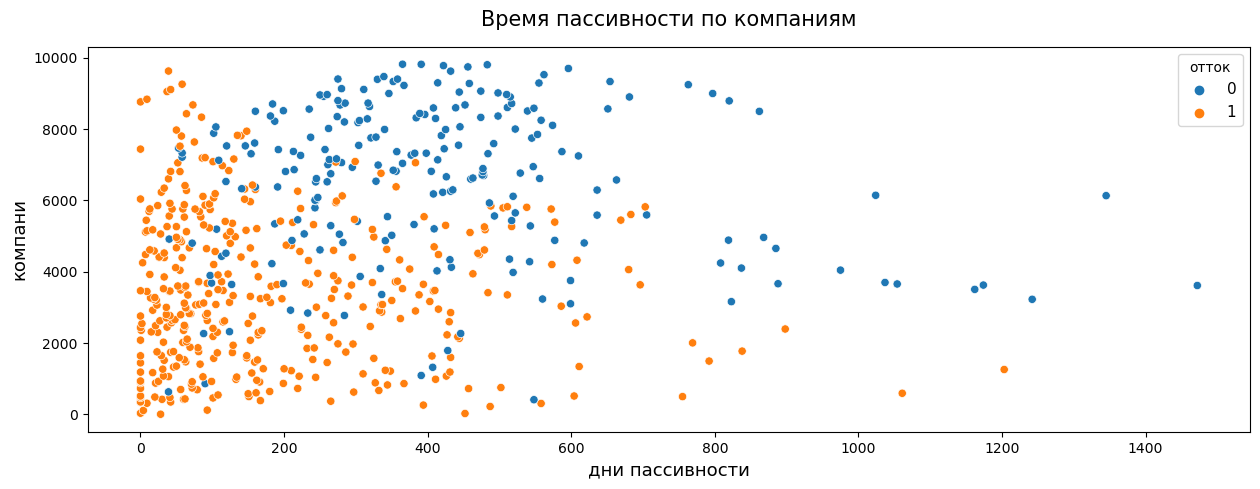

In [182]:
billing_group = billing_clean.pivot_table(index='company_id', values=['tariff_end'], aggfunc='first')
billing_group.reset_index(inplace=True)
billing_group
activities_end = activities_clean.pivot_table(index='company_id', values=['month', 'churn'], aggfunc=({'month':'max',
                                                                                                        'churn': 'first'}))
activities_end.reset_index(inplace=True)
activities_end = activities_end.merge(billing_group, on='company_id', how='left')
activities_end['passivity'] = activities_end['tariff_end'] - activities_end['month']
activities_end.loc[activities_end['passivity'] < timedelta(0) , 'passivity'] = timedelta(0)
activities_end.loc[activities_end['tariff_end'] > '2024-03-28' , 'tariff_end'] = '2024-03-28'
activities_end['passivity'] = activities_end['passivity'].dt.days

plt.figure(figsize=(15, 5))
sns.scatterplot(data=activities_end, x='passivity', y='company_id', hue='churn')
plt.title('Время пассивности по компаниям', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('дни пассивности', fontsize=13, color='black', y=0.9)
plt.ylabel('компани', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.legend(fontsize=11, title='отток')
plt.show()

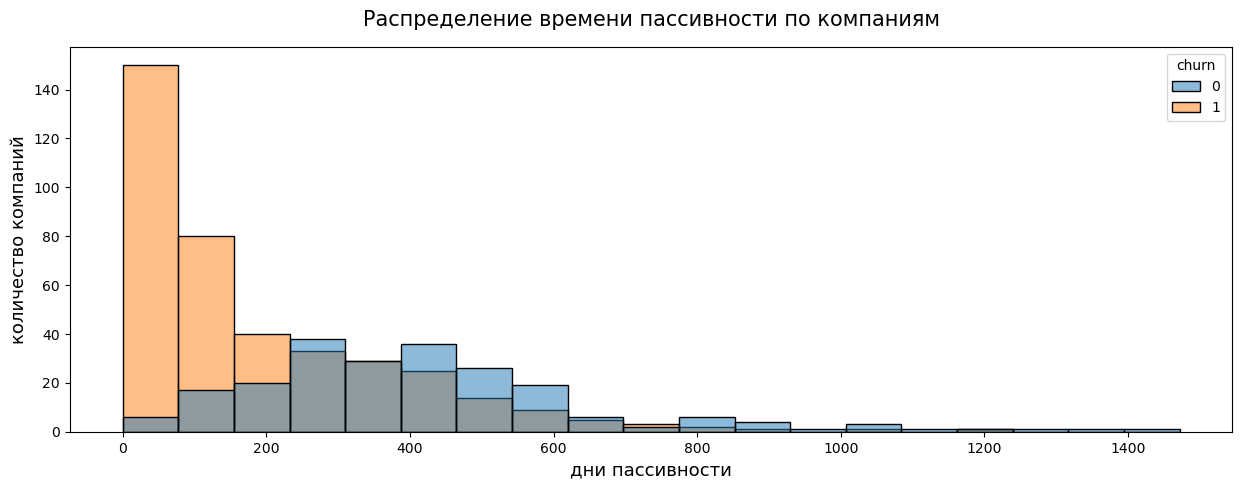

In [183]:
plt.figure(figsize=(15, 5))
sns.histplot(data=activities_end, x='passivity', hue='churn')
plt.title('Распределение времени пассивности по компаниям', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('дни пассивности', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

Интересно, что часто у компаний-подписчиков период пассивности гораздо больше аналогичного периода у ушедших в отток.
На графике прослеживается наличие зависимостей, но линейный характер отсутствует. Проверим корреляцию параметров пассивности и оттока методами Пирсона и хи-квадрат.

In [184]:
print('Корреляция Пирсона по пассивности и оттоку:', 
      activities_end['churn'].corr(activities_end['passivity']))

cor = activities_end.loc[:,['passivity', 'churn']]
cor = cor.dropna()
print('Корреляция хи-квадрат по пассивности и оттоку:', 
      phik.phik_matrix(cor, interval_cols=['passivity'], bins={'passivity':8}).loc['passivity', 'churn'])

Корреляция Пирсона по пассивности и оттоку: -0.4557105229696385
Корреляция хи-квадрат по пассивности и оттоку: 0.6518006722827954


In [185]:
print('Пассивность всех компаний \n',
     activities_end['passivity'].describe())
print('\nПассивность компаний, ушедших в отток \n', 
     activities_end.query('churn == 1')['passivity'].describe())
print('\nПассивность компаний-подписчиков \n', 
      activities_end.query('churn == 0')['passivity'].describe())

Пассивность всех компаний 
 count     611.000000
mean      267.723404
std       236.298111
min         0.000000
25%        74.000000
50%       222.000000
75%       408.500000
max      1472.000000
Name: passivity, dtype: float64

Пассивность компаний, ушедших в отток 
 count     393.000000
mean      187.587786
std       191.378960
min         0.000000
25%        50.000000
50%       115.000000
75%       281.000000
max      1203.000000
Name: passivity, dtype: float64

Пассивность компаний-подписчиков 
 count     218.000000
mean      412.188073
std       241.249506
min        39.000000
25%       255.500000
50%       383.000000
75%       516.500000
max      1472.000000
Name: passivity, dtype: float64


Линейный коэффициент показал слабую корреляцию - 0.46. Для хи-квадрат корреляция оказалась заметной - 0.65.
Похоже период пассивности является фактором, влияющим на отток.

### Совокупная активность

Посмотрим как распределяется общая активность в процентном соотношении по категориям.

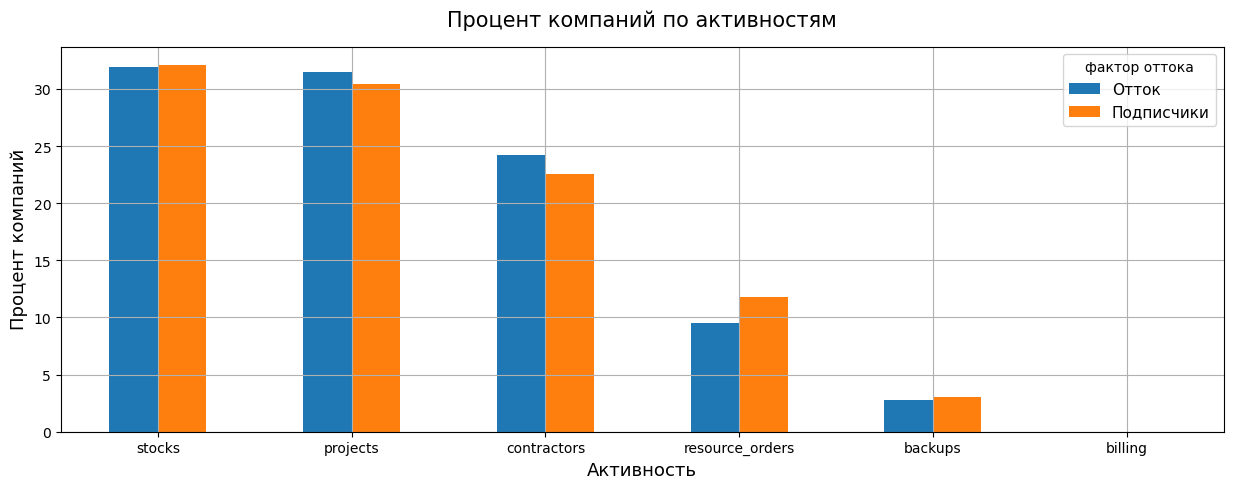

,billing,stocks,backups,projects,contractors,resource_orders
Отток,0.0%,31.94%,2.81%,31.5%,24.21%,9.54%
Подписчики,0.0%,32.13%,3.03%,30.5%,22.54%,11.81%


In [186]:
d_percent_all = activities_clean.copy()
total_show = 0
total_no = 0
result_percent = pd.DataFrame()
for column in d_percent_all.columns:
    if column == 'churn' or column == 'month'  or column == 'company_id':
        continue
    total_no += int(d_percent_all.query('churn == 1')[column].sum())
    total_show += int(d_percent_all.query('churn == 0')[column].sum())
    result_percent.loc['Отток', column] = d_percent_all.query('churn == 1')[column].sum()
    result_percent.loc['Подписчики', column] = d_percent_all.query('churn == 0')[column].sum()

for column in result_percent.columns:
    result_percent.loc['Отток', column] = round(result_percent.loc['Отток', column] / total_no * 100, 2)
    result_percent.loc['Подписчики', column] = round(result_percent.loc['Подписчики', column] / total_show * 100, 2)

result_percent.T.sort_values(by='Подписчики', ascending=False).plot(y=result_percent.index, kind='bar', \
        grid=True, legend=True,
               figsize=(15, 5))
plt.title('Процент компаний по активностям', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Активность', fontsize=13, color='black')
plt.ylabel('Процент компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.legend(fontsize=11, title='фактор оттока')
plt.show()
cols = result_percent.columns
result_percent = result_percent.apply([lambda x: str(x) + '%'], axis=0)
result_percent.columns = cols
result_percent

Активность сбалансирована между группами, сильно выделяющихся факторов не обнаружено. Подписчики на 2% чаще заказывают материалы, в остальном компании оттока проявляют большую или равную активность.
Каждый из факторов активности не значительно влиял на отток, проверим, как влияет на отток совокупность всех факторов. Посчитаем среднюю суммарную месячную активность компаний по всем категориям и проверим её связь с оттоком.

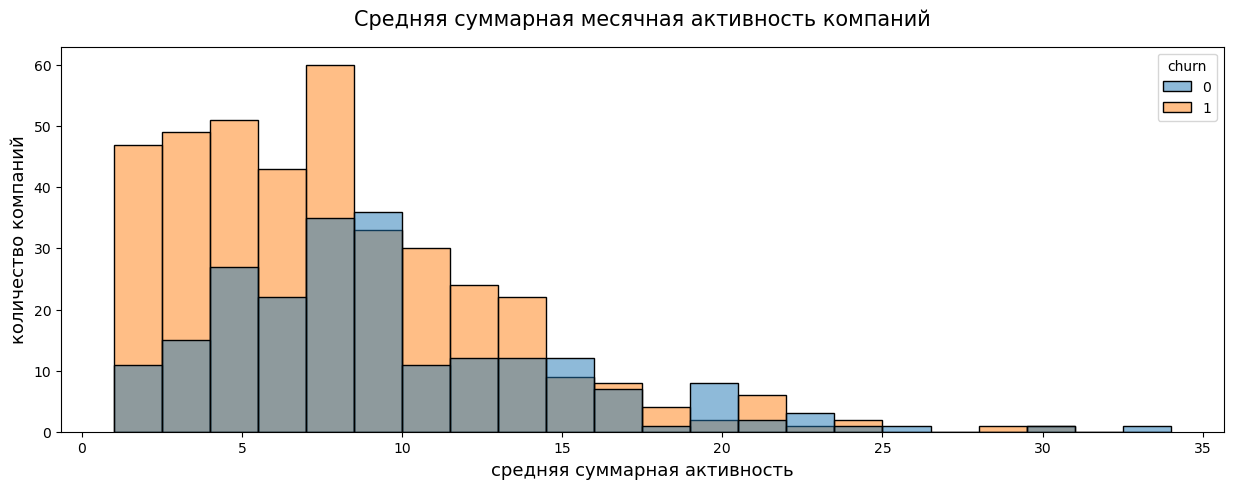

In [187]:
activities_total = activities_clean.copy()
activities_total['total_month'] = activities_total['billing'] + activities_total['stocks'] + \
                                  activities_total['backups'] + activities_total['projects'] + \
                                  activities_total['contractors'] + activities_total['resource_orders']
activities_total_month_mean = activities_total.groupby(['company_id', 'churn']).agg({'total_month': 'mean'})
activities_total_month_mean.reset_index(inplace=True)

plt.figure(figsize=(15, 5))
sns.histplot(data=activities_total_month_mean, x='total_month', hue='churn')
plt.title('Средняя суммарная месячная активность компаний', loc ='center', pad = 15, fontsize=15, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('cредняя суммарная активность', fontsize=13, color='black', y=0.9)
plt.ylabel('количество компаний', fontsize=13, color='black')
plt.xticks(rotation=0, ha='center')
plt.show()

In [188]:
print('Средняя суммарная месячная активность компаний \n',
      activities_total_month_mean['total_month'].describe())
print('\nСредняя суммарная месячная активность компаний, ушедших в отток \n', 
      activities_total_month_mean.query('churn == 1')['total_month'].describe())
print('\nСредняя суммарная месячная активность компаний-подписчиков \n', 
      activities_total_month_mean.query('churn == 0')['total_month'].describe())

Средняя суммарная месячная активность компаний 
 count    611.000000
mean       8.300119
std        5.169136
min        1.000000
25%        4.354167
50%        7.600000
75%       11.000000
max       34.000000
Name: total_month, dtype: float64

Средняя суммарная месячная активность компаний, ушедших в отток 
 count    393.000000
mean       7.691398
std        4.913620
min        1.000000
25%        4.000000
50%        7.000000
75%       10.333333
max       30.000000
Name: total_month, dtype: float64

Средняя суммарная месячная активность компаний-подписчиков 
 count    218.000000
mean       9.397494
std        5.442079
min        1.000000
25%        5.500000
50%        8.339286
75%       12.500000
max       34.000000
Name: total_month, dtype: float64


Характер распределения средней суммарной активности для оттока и подписчиков различается. В среднем за месяц компании совершают 8.3 действий на платформе, медианное значение - 7.6. Среднее количество действий для компаний оттока чуть меньше и составляет 7.7 действий при медиане равной 7. Подписчики напротив склонны в среднем совершать больше действий в месяц - 9.4 при медианном значении 8.3. Проверим тестом Стьюдента, есть ли статистически значимые различия суммарной активности для этих групп.

In [189]:
# Функция для формирования выборок из данных по конверсии
def sample_maker(table, field, target):
    
    sample = []
    target_group = table.loc[table['churn'] == target]
    for index in target_group.index:
        sample.append(target_group.loc[index, field])
    print('Среднее значение активности группы, из', target, '=', f'{round(statistics.mean(sample), 2)}')
            
    return sample

# Функция проверки гипотез методом scipy.stats.ttest_ind
def hypothesis_checker(table, field, first_target, second_target, alpha):
    
    first_group = sample_maker(table, field, first_target) # Распределение параметра первой группы
    second_group = sample_maker(table, field, second_target) # Распределение параметра второй группы
    
    first_group_var = np.var(first_group, ddof=1)
    second_group_var = np.var(second_group, ddof=1)
    var_difference = abs(1 - first_group_var / second_group_var)

    if var_difference < 0.05:
        equivalent = True
    else:
        equivalent = False

    print('Дисперсия первой выборки:', first_group_var)
    print('Дисперсия второй выборки:', second_group_var)
    print(f'Величины дисперсий различаются на {var_difference:.2%}, '
      f'поэтому параметру "equal_var" задаём значение {equivalent}')

    # Применим метод scipy.stats.ttest_ind, чтобы проверить гипотезу о равенстве средних двух выборок
    results = st.ttest_ind(first_group, second_group, equal_var=equivalent)
    print('p-значение:', (results.pvalue), '\nУровень значимости:', alpha, '\nВывод:')
    # Проверяем p-value
    if (results.pvalue < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

Одни пользователи ушли в отток, другие сохранили подписку. Проверим гипотезу: суммарная месячная активность различается у этих двух групп.

Сформулируем нулевую и альтернативную гипотезы:    

- **Нулевая гипотеза:** суммарная месячная активность компаний, ушедших в отток **равна** суммарной месячной активности компаний, сохранивших подписку.
- **Альтернативная гипотеза:** суммарная месячная активность компаний, ушедших в отток **отличается** от суммарной месячной активности компаний, сохранивших подписку.    

Поскольку у нас две независимые выборки и гипотеза о равенстве средних двух генеральных совокупностей, для проверки применим метод **scipy.stats.ttest_ind**

In [190]:
hypothesis_checker(table = activities_total_month_mean, # Таблица
                   field='total_month', # Выбираем поле
                   first_target=1, # Задаём первую выборку
                   second_target=0, # Задаём вторую выборку
                   alpha=0.05) # Задаём уровень значимости 5%

Среднее значение активности группы, из 1 = 7.69
Среднее значение активности группы, из 0 = 9.4
Дисперсия первой выборки: 24.143665055239385
Дисперсия второй выборки: 29.616223823548548
Величины дисперсий различаются на 18.48%, поэтому параметру "equal_var" задаём значение False
p-значение: 0.00014182877759145665 
Уровень значимости: 0.05 
Вывод:
Отвергаем нулевую гипотезу


Разница между дисперсиями выборок составляет 18.48%, считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.
P-value составляет 0.00014, что значительно меньше 5%, по результатам проверки **не получилось принять нулевую гипотезу** - суммарная месячная активность компаний, ушедших в отток статистически значимо отличается от суммарной месячной активности компаний, сохранивших подписку.

### Вывод <a id='conclusion_6'></a>

Компании-подписчики и ушедшие в отток показывают схожую медианную активность.
Анализ активности по месяцам жизни компаний показал, что в первое время на платформе у групп оттока и подписчиков одинаково низкое количество действий. Активизация начинается после 30 месяца жизни, причем для ушедших в отток более характерна активность, связанная с взаимодействием со складами, созданием проектов и выставлением счетов. Компании, не ушедшие в отток чаще заказывают материалы. У обеих групп схожий формат взаимодействия с контрагентами.
Активность во времени по тарифам покзала, что взаимодействие со складами, контрагентами, создание проектов и выставление счетов наиболее характерно для тарифов бизнес и профи. Материалы активнее заказывают на тарифе бизнес. Прослеживаются характерные для отрасли периоды отсутствия заказов и всплесков активности.

Время жизни компаний составляет в среднем 10.5 месяцев, медианное значение - 8 месяцев. При этом компании, ушедшие в отток живут в среднем на месяц меньше - 9.5 месяцев при медианном значении 7 месяцев. А компании-подписчики, напротив, имеют медианное время жизни на месяц больше общего - 9 месяцев и среднее значение времени жизни 12.7 месяцев.

Анализ пассивности компаний - временных интервалов между последним действием на платформе и концом подписки / временем начала исследования показал, что часто у компаний-подписчиков период пассивности гораздо больше аналогичного периода у ушедших в отток. На графике прослеживалось наличие взаимосвязей продолжительности пассивности и оттока, но линейный характер отсутствал. Проверка корреляции параметров пассивности и оттока методами Пирсона и хи-квадрат показала слабую корреляцию для линейного коэффициента - 0.46. Для хи-квадрат корреляция оказалась заметной - 0.65. **Похоже период пассивности является фактором, влияющим на отток**.

Совокупная активность сбалансирована между группами по оттоку, сильно выделяющихся факторов не обнаружено. Подписчики на 2% чаще заказывают материалы, в остальном компании оттока проявляют большую или равную активность. Каждый из факторов активности не значительно влиял на отток. Для проверки влияния на отток совокупности всех факторов посчитали среднюю суммарную месячную активность компаний по всем категориям и проверили её связь с оттоком. График показал различие характеров распределения средней суммарной активности для оттока и подписчиков. В среднем за месяц компании совершают 8.3 действий на платформе, медианное значение - 7.6. Среднее количество действий для компаний оттока чуть меньше и составляет 7.7 действий при медиане равной 7. Подписчики напротив склонны в среднем совершать больше действий в месяц - 9.4 при медианном значении 8.3.
Проверка тестом Стьюдента, наличия статистически значимых различий суммарной активности для этих групп подтвердила, что **суммарная месячная активность компаний, ушедших в отток статистически значимо отличается от суммарной месячной активности компаний, сохранивших подписку**.

## Результаты исследования <a id='result'></a>

Исследование проводилось на основе таблиц billing.csv 3480 записей, activities.csv 6316 записей, companies.csv 723 записи, people.csv 5095 записей. Загрузки таблиц прошли без ошибок. Выборка является достаточной для проведения иссследования.

В ходе предобработки внесены следующие изменения:
- Таблица billings. Столбцы с датами приведены к формату datetime. Поле 'billing_tariff_price_id' приведено к формату int. Удалены столбцы 'Unnamed: 0.1', 'Unnamed: 0', 'id'. В данных обнаружен и удален один полный дубликат. Дубликатов по датам не обнаружено. Столбцы 'comment', 'pay_date' содержат значительное количество пропусков 79% и 68%, поэтому удалять их не будем, пропуски в этих столбцах не повлияют на исследование. Возможная причина такого количества пропусков в том, что данные столбцы заполнялись вручную.
- Таблица activities. Удален столбец 'Unnamed: 0'. Названия столбцов приведены к змеиному регистру, из названий столбцов убраны слова "company_month_", чтобы не загромождать лишней информацией. Столбец "month" приведен к формату datetime. Полные дубликаты и дублированнная информация о месячной активности компаний не обнаружены. Пропуски отсутствуют.
- Таблица companies. Данные столбцов 'created_at', 'updated_at' приведены к формату datetime. Удален столбец 'Unnamed: 0'. Стобец 'id', содержащий идентификатор компании, переименован в общее для остальных таблиц название 'company_id'. Полные дубликаты и дублированные идентификаторы компаний отсутствуют. 1% пропусков присутствует в столбце 'billing_tariff_id'. Поскольку это данные о тарифах, заполнить их нечем. Поскольку такой небольшой процент пропусков не повлияет на исследование, пропуски оставили незаполненными.
- Таблица people. Столбцы 'created_at', 'updated_at', 'deleted_at' приведены к формату datetime. Удален столбец 'Unnamed: 0'. Полные дубликаты и дубликаты сотрудников в компании отсутствуют. Столбцы 'deleted_at', 'user_id' содержат 57% и 25% пропусков. Данные столбцы не будут использоваться в исследовании, поэтому пропуски оставлены незаполненными.

Поскольку данные в таблицах разнятся по представленным копаниям, типам временных даных и назначению, объединять их не стали, чтобы не вносить дополнительные искажения в общую картину. К таблицам были добавлены поля с целевой переменной, после чего содержание каждой таблицы было рассматрено отдельно.
Для определения целевой переменной была создана таблица "target", сгруппированая по последнему обновлению, последнему тарифу и содержащая идентификатор оттока 'churn': "1" - компания ушла в отток, "0" - компания подписана на сервис и столбец 'tariff_type' c информацией о типе тарифа.

**Исследовательский анализ**

За всё время наблюдений в отток ушли 77.3% компаний.
- Таблица activities содержит данные о действиях на платформе 716 компаний в период с 2019-01-01 по 2024-03-01. В данных присутствуют выбросы значительно превышающие три стандартных отклонения. Чтобы определить основные тенденции в активности, убрали выбросы больше 90 перцетиля. После очистки размер выборки составил 2662 записей, выборка сохранила реперезентаивность. Активность у групп по фактору имеет схожий характер распределений, группа оттока больше по размеру и количественные показатели у неё выше. Во времени активность уникальных компаний ушедших в отток постоянно уменьшается, фактически они сначала перестают пользоваться сервисом, а потом у них заканчивается срок действия тарифа. Большинство компаний, которые вносили вклад в MAU в 2021 - 2022 годах на данный момент ушли в отток и основной вклад в MAU сейчас вносят компании, пришедшие в сервис после 2022 года.

- Таблица companies содержит данные о 723 компаниях, пришедших в сервис в период с 2019-01-23 по 2024-02-07. На различных тарифах группы по фактору оттока показывают схожие соотношения распределений, кроме компаний **на тарифе "business", для этого тарифа характерно, что количество компаний ушедших в отток меньше количества компаний подписчиков**. Чем больше число сотрудников в компании, тем таких компаний меньше, в самых распространенных компаниях от 1 до 10 сотруднирков. Самые распространенные тарифы - 2, 7, 9 (базовый, старт, бизнесс). По времени регистрации компании можно увидеть, что недавно пришедшие колмпании менее склонны к оттоку, чем старые. **Похоже у компаний есть определённый лайфтайм на платформе**. График обновления показывает стабильный рост числа компаний, данные о которых обновляются.

- Таблица people содержит данные о 5095 сотрудниках в 712 компаниях, добавленных в период с 2019-01-23 по 2023-12-13. Количество профессий сотрудников составляет 1411. Кроме полей с датами, остальные данные категориальные. Из таблицы были получены данные о числе зарегистрированных сотрудников в копаниях. Чем меньше сотрудников в компании, тем таких компаний больше. **Интересно что при числе сотрудников больше трёх, вероятность оттока компании начинает снижаться. Наболее подвержены оттоку компании с одним - двумя зарегистрированными сотрудниками**. в среднем в компаниях около 5 сотрудников медианное значение сотрудников равно трём. У компаний ушедших в отток медианное значение сотрудников также равно трём, среднее число сотрудников менее пяти. У компаний, с действущей подпиской, напротив медианное число сотрудников - 5 человек, а среднее почти шесть. **Количество сотрудников в компании выше среднего может быть положителдьным фактором для продления подписки**.

- Таблица billing показывает, как и в данных по компаниям, что наиболее популярными являются тарифы 2, 7, 9 (базовый, старт, бизнес), но таблица billing показывает для тарифа бизнес соотношение, в котором преобладают компании оттока. У большого числа компаний была подписка до второй половины 2023 года, но они её не продлили и ушли в отток. Похоже это связано с тем что в период с начала 2022 года количество обновлений тарифов начало снижаться. Компанни обновили тариф в 2022, и после этого не продлевали подписку. Возможно это как-то связано с временем жизни компании на платформе. По billing_tariff_price_id подписчики и отток распределены пропорционально общей тенденции, за исключением **id 5 и 29, которые можно считать наиболее удачными в плане соотношения подписчиков и оттока**. Наибольшая доля оттока наблюдается на id 1, 6, 7, 13, 14, 20, 21, 22.


**Проверка корреляции**

Расчет коэффициентов корреляции Пирсона и хи-квадрат не показали сильной взаимосвязи оттока от какого-то отдельного параметра, похоже на отток влияет **совокупность нескольких факторов**, сочетание которых дает негативный прогноз.


**Портрет компании**

В среднестатистической в компании не более 10 сотрудников. Чаще всего эти компании подключились к сервису с 2020 по 2023 год и имеют подписку, заканчивающуюся с 2023 по 2025 год. У самых распространенных компаний подписка продлена в конце 2021 - начале 2022 года и подписаны такие компании на базовый или стартовый тариф.

**Проверка гипотез**

- Для проверки зависимости оттока от количества сотрудников в компании выделили три группы: 1 категория (от 1 до 4 сотрудников), 2 категория (от 5 до 10 сотрудников) и крупные компании (более 10 сотрудников) - все остальные категории. Проверили гипотезы: доля ушедших в отток компаний различается у этих групп. Для определения статистически значимой разницы между группами, приеменили проверку z-критерием по долям. Соотношения долей оттока компаний группах по количеству сотрудников не позволили отвергнуть гипотезы о том что процент оттока компаний одинаков в этих группах. **Вероятность оттока не зависит от числа сотрудников**.

- Для проверки взаимосвязи оттока от тарифа применили функцию для проверки гипотезы о равенстве долей. Одни компании подписаны на один тариф, другие на другой. Проверили гипотезы: доли ушедших в отток компаний различаются у этих двух групп. Соотношения долей показали, что для тарифов start, base, profi не получилось отвергнуть нулевую гипотезу, доли оттока в этих группах статистически значимо не различаются. Проверка соотношения долей тарифа business с тарифами start и base, показала статистически значимые различия в доле оттока в группах, нулевая гипотеза для данных тарифов не подтвердилась. **Доля ушедших в отток с тарифа business оказалась меньше, чем у других тарифов**.

- Анализ динамики ухода с разных тарифов по годам покзал, что сначала лидером по оттоку был тариф "start", но с 2021 года лидером по оттоку стал тариф "base". Такое соотношение связано скорее всего с, ростом количества компаний в группе "base".


- Влияние billing_tariff_price_id на целевую переменную довольно слабое: коэффициент корреляции -0.094 для Пирсона и 0.223 для хи-квадрат. Подписчики и отток распределены пропорционально общей тенденции, за исключением id 5 и 29, которые можно считать наиболее удачными в плане соотношения подписчиков и оттока. Наибольшая доля оттока наблюдается на id 1, 6, 7, 13, 14, 20, 21, 22.

**Анализ активности компаний**

- Компании-подписчики и ушедшие в отток показывают схожую медианную активность.
Анализ активности по месяцам жизни компаний показал, что в первое время на платформе у групп оттока и подписчиков одинаково низкое количество действий. Активизация начинается после 30 месяца жизни, причем для ушедших в отток более характерна активность, связанная с взаимодействием со складами, созданием проектов и выставлением счетов. Компании, не ушедшие в отток чаще заказывают материалы. У обеих групп схожий формат взаимодействия с контрагентами.
Активность во времени по тарифам покзала, что взаимодействие со складами, контрагентами, создание проектов и выставление счетов наиболее характерно для тарифов бизнес и профи. Материалы активнее заказывают на тарифе бизнес. Прослеживаются характерные для отрасли периоды отсутствия заказов и всплесков активности.

- Время жизни компаний составляет в среднем 10.5 месяцев, медианное значение - 8 месяцев. При этом компании, ушедшие в отток живут в среднем на месяц меньше - 9.5 месяцев при медианном значении 7 месяцев. А компании-подписчики, напротив, имеют медианное время жизни на месяц больше общего - 9 месяцев и среднее значение времени жизни 12.7 месяцев.

- Анализ пассивности компаний - временных интервалов между последним действием на платформе и концом подписки / временем начала исследования показал, что часто у компаний-подписчиков период пассивности гораздо больше аналогичного периода у ушедших в отток. На графике прослеживалось наличие взаимосвязей продолжительности пассивности и оттока, но линейный характер отсутствал. Проверка корреляции параметров пассивности и оттока методами Пирсона и хи-квадрат показала слабую корреляцию для линейного коэффициента - 0.46. Для хи-квадрат корреляция оказалась заметной - 0.65. **Похоже период пассивности является фактором, влияющим на отток**.

- Совокупная активность сбалансирована между группами по оттоку, сильно выделяющихся факторов не обнаружено. Подписчики на 2% чаще заказывают материалы, в остальном компании оттока проявляют большую или равную активность. Каждый из факторов активности не значительно влиял на отток. Для проверки влияния на отток совокупности всех факторов посчитали среднюю суммарную месячную активность компаний по всем категориям и проверили её связь с оттоком. График показал различие характеров распределения средней суммарной активности для оттока и подписчиков. В среднем за месяц компании совершают 8.3 действий на платформе, медианное значение - 7.6. Среднее количество действий для компаний оттока чуть меньше и составляет 7.7 действий при медиане равной 7. Подписчики напротив склонны в среднем совершать больше действий в месяц - 9.4 при медианном значении 8.3. Проверка тестом Стьюдента, наличия статистически значимых различий суммарной активности для этих групп подтвердила, что **суммарная месячная активность компаний, ушедших в отток статистически значимо отличается от суммарной месячной активности компаний, сохранивших подписку**.

**Вывод:**    

Целевой аудиторией сервиса являются компании в которых не более 10 сотрудников. Чаще всего эти компании подключились к сервису с 2020 по 2023 год и имеют подписку, заканчивающуюся с 2023 по 2025 год. У самых распространенных компаний подписка продлена в конце 2021 - начале 2022 года и подписаны такие компании на базовый или стартовый тариф. Эта категория компаний нуждается в услугах сервиса, поскольку они уже слишком крупные для того, чтобы решать бизнес-задачи подручными средствами, но не достаточно большие, чтобы обслуживать и содержать собственные системы управления и учета. Плохо, что они чаще всего подписаны на базовый или стартовый тарифы, отток с которых довольно высокий. Рекомендуется рассмотреть возможность предоставления им функционала, предполагаемого тарифом "бизнес", у которого лучшие показатели удержания. Также, при формировании тарифов рекомендуется учитывать характерные для отрасли периоды повышенной активности работы компаний, и периодов ограниченной деятельности, на время которых предоставлять возможность частичной заморозки активности и оплаты (например ограничить работу с сервисом только чтением данных компании без записи, а при внесении новых данных снова активировать тариф).

Для определения склонности компании к оттоку рекомендуется отслеживать совокупность следующих факторов:
Поскольку средннее время жизни компаний, ушедшщих в отток составляет 9.5 месяцев, а медианное - 7 месяцев, то начиная с седьмого меяца необходимо отслеживать суммарную месячную активности компани на платформе, значение которой около 7.7 и ниже должно являться тревожным фактором приближающегося оттока. Также плохо, если в дополнение к это у компании начался период пассивности, критическими сроками в котором являются среднее значение 187 дней и медианное 115 дней, после которых вероятность непродления подписки растёт. Усугубляющим фактором ухода является и число сотрудников, **зарегистрированных в таблице people**, меньше 3, а также нахождение на базовом или стартовом тарифах.